In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# #이후 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import warnings   
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score

from sklearn.feature_selection import SelectFromModel #SelectFromModel import
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


In [ ]:
cd /content/drive/MyDrive/UBION_final_project/data

/content/drive/MyDrive/UBION_final_project/data


# show_result, store_result

In [ ]:
def show_result(y_test, prediction):
  global condition

  # confusion_matrix 시각화
  sns.heatmap(confusion_matrix(y_test, prediction), annot=True,fmt="d", cmap='Reds')
  plt.xlabel('Predict')
  plt.ylabel('Actual')
  plt.show()

  #Confusion_matrix
  CM = confusion_matrix(y_test, prediction)
  print(CM)

  # 정확도
  A = round( accuracy_score(y_test,prediction),3)
  print("accuracy", A)

  #정밀도
  P = round( precision_score(y_test, prediction),3) 
  print("precision : ", P ) 

  #재현율
  R = round( recall_score(y_test, prediction), 3)
  print("recall : ", round( recall_score(y_test, prediction), 3) )

  #f1-score
  F = round( f1_score(y_test, prediction), 3)
  print("f1_score : ", F )
  
  condition.append(CM)
  condition.append(A)
  condition.append(P)
  condition.append(R)
  condition.append(R)

In [ ]:
# model_result_df = pd.read_csv('/content/drive/MyDrive/UBION_final_project/data/model_result_df.csv')
# model_result_df = model_result_df.iloc[0:0]
# model_result_df.to_csv('/content/drive/MyDrive/UBION_final_project/data/model_result_df.csv', index=False)
# model_result_df

In [ ]:
def store_result(condition):
  model_result_df = pd.read_csv('/content/drive/MyDrive/UBION_final_project/data/model_result_df.csv')
  model_result_df = model_result_df[['데이터프레임', 'train_test_split(Y/R)', 'T-test(Y/N)','변수선택법', 'sampling 방식' ,'적용모델', '선택된 변수','혼동행렬', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'hyperparameter 변경']]
  
  condition= pd.DataFrame({len(model_result_df): condition}).transpose()
  condition.columns = ['데이터프레임', 'train_test_split(Y/R)', 'T-test(Y/N)', '변수선택법', 'sampling 방식' ,'적용모델', '선택된 변수','혼동행렬', 'Accuracy', 'Precision', 'Recall', 'F1-score','hyperparameter 변경']
  
  model_result_df = pd.concat([model_result_df, condition], axis=0)

  model_result_df.to_csv('model_result_df.csv', index=False)

# Excute_model

## basic

In [ ]:
def Excute_lg (X_train, y_train, X_test, y_test):
  lr = LogisticRegression(random_state=0)
  
  lr.fit(X_train, y_train) 
  prediction = lr.predict(X_test)

  show_result(y_test, prediction)

In [ ]:
def Excute_sgd(X_train, y_train, X_test, y_test):
  sgd = SGDClassifier(random_state=0)

  sgd.fit(X_train, y_train)
  prediction = sgd.predict(X_test)
  
  show_result(y_test, prediction)

In [ ]:
def Excute_knn(X_train, y_train, X_test, y_test):
  knn = KNeighborsClassifier()

  knn.fit(X_train, y_train)
  prediction = knn.predict(X_test)

  show_result(y_test, prediction)

In [ ]:
def Excute_svm(X_train, y_train, X_test, y_test):
  svc = SVC(random_state=0)

  svc.fit(X_train, y_train)
  prediction = svc.predict(X_test)

  show_result(y_test, prediction)

In [ ]:
def Excute_dt(X_train, y_train, X_test, y_test):
  dt = DecisionTreeClassifier(random_state=0)

  dt.fit(X_train, y_train)
  prediction = dt.predict(X_test)

  show_result(y_test, prediction)

In [ ]:
def Excute_rf(X_train, y_train, X_test, y_test):
  rfc = RandomForestClassifier(random_state=0)

  rfc.fit(X_train, y_train)
  prediction = rfc.predict(X_test)

  show_result(y_test, prediction)

In [ ]:
def Excute_pr(X_train, y_train, X_test, y_test):
  dt2 = DecisionTreeClassifier(max_depth=2)

  dt2.fit(X_train, y_train)
  prediction = dt2.predict(X_test)
  
  show_result(y_test, prediction)

## change_cutoff

In [ ]:
def change_cutoff(result_df):
  value_00 = result_df[(result_df['actual']==0) & (result_df['prediction']== 0)]['부도_prob'].max()
  value_01 = result_df[(result_df['actual']==0) & (result_df['prediction']== 1)]['부도_prob'].min()
  value_10 = result_df[(result_df['actual']==1) & (result_df['prediction']== 0)]['부도_prob'].max()
  value_11 = result_df[(result_df['actual']==1) & (result_df['prediction']== 1)]['부도_prob'].min()

  if value_10 < value_00:
    cutoff = value_11
    result_df.loc[(result_df['actual']==0) & (result_df['prediction']== 1) & (result_df['부도_prob']<cutoff) , 'prediction'] = 0
  
  if value_11 > value_01:
    cutoff= value_00
    result_df.loc[(result_df['actual']==1) & (result_df['prediction']== 0) & (result_df['부도_prob']>cutoff) , 'prediction'] = 1

  return result_df

In [ ]:
def Excute_lg_change_cutoff (X_train, y_train, X_test, y_test):
  lr = LogisticRegression(random_state=0)
  lr.fit(X_train, y_train) 
  prediction = lr.predict(X_test)
  prediction_prob =lr.predict_proba(X_test)

  result_df = pd.DataFrame(prediction_prob, columns=['정상_prob','부도_prob'])
  result_df['actual'] = y_test
  result_df['prediction'] = prediction

  return_df = change_cutoff(result_df)
  show_result(result_df['actual'], result_df['prediction'])

In [ ]:
def Excute_sgd_change_cutoff(X_train, y_train, X_test, y_test):
  sgd = SGDClassifier(random_state=0)
  sgd.fit(X_train, y_train)
  prediction = sgd.predict(X_test)
  prediction_prob =sgd.predict_proba(X_test)

  result_df = pd.DataFrame(prediction_prob, columns=['정상_prob','부도_prob'])
  result_df['actual'] = y_test
  result_df['prediction'] = prediction

  return_df = change_cutoff(result_df)
  show_result(result_df['actual'], result_df['prediction'])

In [ ]:
def Excute_svm_change_cutoff(X_train, y_train, X_test, y_test):
  svc = SVC(random_state=0, probability=True)
  svc.fit(X_train, y_train)
  prediction = svc.predict(X_test)
  prediction_prob =svc.predict_proba(X_test)

  result_df = pd.DataFrame(prediction_prob, columns=['정상_prob','부도_prob'])
  result_df['actual'] = y_test
  result_df['prediction'] = prediction

  return_df = change_cutoff(result_df)
  show_result(result_df['actual'], result_df['prediction'])

In [ ]:
def Excute_pr_change_cutoff(X_train, y_train, X_test, y_test):
  dt2 = DecisionTreeClassifier(max_depth=2)
  dt2.fit(X_train, y_train)
  prediction = dt2.predict(X_test)
  prediction_prob =dt2.predict_proba(X_test)

  result_df = pd.DataFrame(prediction_prob, columns=['정상_prob','부도_prob'])
  result_df['actual'] = y_test
  result_df['prediction'] = prediction

  return_df = change_cutoff(result_df)
  show_result(result_df['actual'], result_df['prediction'])

In [ ]:
def Excute_dt_change_cutoff(X_train, y_train, X_test, y_test):
  dt = DecisionTreeClassifier(random_state=0)
  dt.fit(X_train, y_train)
  prediction = dt.predict(X_test)
  prediction_prob =dt.predict_proba(X_test)

  result_df = pd.DataFrame(prediction_prob, columns=['정상_prob','부도_prob'])
  result_df['actual'] = y_test
  result_df['prediction'] = prediction

  return_df = change_cutoff(result_df)
  show_result(result_df['actual'], result_df['prediction'])

In [ ]:
def Excute_knn_change_cutoff(X_train, y_train, X_test, y_test):
  knn = KNeighborsClassifier()
  knn.fit(X_train, y_train)
  prediction = knn.predict(X_test)
  prediction_prob =knn.predict_proba(X_test)

  result_df = pd.DataFrame(prediction_prob, columns=['정상_prob','부도_prob'])
  result_df['actual'] = y_test
  result_df['prediction'] = prediction

  return_df = change_cutoff(result_df)
  show_result(result_df['actual'], result_df['prediction'])

In [ ]:
def Excute_rf_change_cutoff(X_train, y_train, X_test, y_test):
  rfc = RandomForestClassifier(random_state=0)
  rfc.fit(X_train, y_train)
  prediction = rfc.predict(X_test)
  prediction_prob =rfc.predict_proba(X_test)

  result_df = pd.DataFrame(prediction_prob, columns=['정상_prob','부도_prob'])
  result_df['actual'] = y_test
  result_df['prediction'] = prediction

  return_df = change_cutoff(result_df)
  show_result(result_df['actual'], result_df['prediction'])

# sampling

In [ ]:
def RUSE(X_train, y_train):
  print("3. RUSE")
  from imblearn.under_sampling import RandomUnderSampler
  rus = RandomUnderSampler()
  
  X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)
  
  return X_undersampled, y_undersampled

In [ ]:
def ROSE(X_train, y_train):
  print("3. ROSE")
  from imblearn.over_sampling import RandomOverSampler
  ros = RandomOverSampler()

  X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)
  
  return X_oversampled, y_oversampled

In [ ]:
def SMOTE(X_train, y_train):
  print("3. SMOTE")
  from imblearn.over_sampling import SMOTE
  smote = SMOTE()
  X_smoted, y_smoted = smote.fit_resample(X_train,y_train)
  
  return X_smoted, y_smoted

# feature_selection

In [ ]:
def forward_feature_selection(X_train, y_train):
  print("2. forward_featue_selection")
  variables = X_train.columns.tolist() ## 설명 변수 리스트
  
  y = y_train ## 반응 변수
  selected_variables = [] ## 선택된 변수들
  sl_enter = 0.05
  
  sv_per_step = [] ## 각 스텝별로 선택된 변수들
  adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
  steps = [] ## 스텝
  step = 0
  while len(variables) > 0:
      remainder = list(set(variables) - set(selected_variables))
      pval = pd.Series(index=remainder) ## 변수의 p-value
      ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
      ## 선형 모형을 적합한다.
      for col in remainder: 
          X = X_train[selected_variables+[col]]
          X = sm.add_constant(X)
          model = sm.OLS(y,X).fit()
          pval[col] = model.pvalues[col]
  
      min_pval = pval.min()
      if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
          selected_variables.append(pval.idxmin())
          
          step += 1
          steps.append(step)
          adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
          adjusted_r_squared.append(adj_r_squared)
          sv_per_step.append(selected_variables.copy())
      else:
          break

  return selected_variables

In [ ]:
def backward_feature_selection(X_train, y_train):
  print("2. backward_feature_selection")
  variables = X_train.columns.tolist() ## 설명 변수 리스트
 
  y = y_train ## 반응 변수
  selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
  sl_remove = 0.05
  
  sv_per_step = [] ## 각 스텝별로 선택된 변수들
  adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
  steps = [] ## 스텝
  step = 0
  while len(selected_variables) > 0:
      X = sm.add_constant(X_train[selected_variables])
      p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
      max_pval = p_vals.max() ## 최대 p-value
      if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
          remove_variable = p_vals.idxmax()
          selected_variables.remove(remove_variable)
  
          step += 1
          steps.append(step)
          adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
          adjusted_r_squared.append(adj_r_squared)
          sv_per_step.append(selected_variables.copy())
      else:
          break
  return selected_variables

In [ ]:
def stepwise_feature_selection(X_train, y_train):
  print("2. stepwise_feature_selection")
  variables = X_train.columns.tolist() ## 설명 변수 리스트
  y = y_train ## 반응 변수

  selected_variables = [] ## 선택된 변수들
  sl_enter = 0.05
  sl_remove = 0.05
  
  sv_per_step = [] ## 각 스텝별로 선택된 변수들
  adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
  steps = [] ## 스텝
  step = 0
  while len(variables) > 0:
      remainder = list(set(variables) - set(selected_variables))
      pval = pd.Series(index=remainder) ## 변수의 p-value
      ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
      ## 선형 모형을 적합한다.
      for col in remainder: 
          X = X_train[selected_variables+[col]]
          X = sm.add_constant(X)
          model = sm.OLS(y,X).fit()
          pval[col] = model.pvalues[col]
  
      min_pval = pval.min()
      if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
          selected_variables.append(pval.idxmin())
          ## 선택된 변수들에대해서
          ## 어떤 변수를 제거할지 고른다.
          while len(selected_variables) > 0:
              selected_X = X_train[selected_variables]
              selected_X = sm.add_constant(selected_X)
              selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
              max_pval = selected_pval.max()
              if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                  remove_variable = selected_pval.idxmax()
                  selected_variables.remove(remove_variable)
              else:
                  break
          
          step += 1
          steps.append(step)
          adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
          adjusted_r_squared.append(adj_r_squared)
          sv_per_step.append(selected_variables.copy())
      else:
          break

  return selected_variables

In [ ]:
def lasso_feature_selection(X_train, y_train):
  reg = LassoCV()
  reg.fit(X_train, y_train)
  coef = pd.Series(reg.coef_, index = X_train.columns)

  print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
  
  imp_coef = coef.sort_values(ascending=False)
  selected_variables = imp_coef[imp_coef!=0]

  return selected_variables

# train/test/split

In [ ]:
def split_by_Y(df):
    print("1. split_by_Y")
    after_2018  = df.loc[df['회계년도'] >= 2018]['차기부도여부'].value_counts()[1]
    before_2018 = df.loc[df['회계년도'] <  2018]['차기부도여부'].value_counts()[1]
    SIZE = after_2018/len(df)

    test = df[df['회계년도'] >= 2018]
    train = df[df['회계년도'] < 2018]
    
    test.drop(columns = ['회계년도','회사명', '거래소코드','산업대분류'], inplace=True)
    train.drop(columns= ['회계년도','회사명', '거래소코드','산업대분류'], inplace=True)

    X_train = train.drop(['차기부도여부'], axis= 1)
    y_train = train['차기부도여부']

    X_test = test.drop(['차기부도여부'], axis=1)
    y_test = test['차기부도여부']

    return X_train, y_train, X_test, y_test

In [ ]:
def split_by_R(df):
    print("1. split_by_R")
    from sklearn.model_selection import train_test_split
    
    data = df.drop(['차기부도여부'], axis= 1)
    target = df['차기부도여부']

    # train_test_split
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.178, shuffle=True, stratify=target, random_state=34)
    X_test.drop(columns = ['회계년도','회사명', '거래소코드','산업대분류'], inplace=True)
    X_train.drop(columns= ['회계년도','회사명', '거래소코드','산업대분류'], inplace=True)

    return X_train, y_train, X_test, y_test

# T-test

In [ ]:
def z_test(eq_var, nc, bc):
    from statsmodels.stats.weightstats import ztest
    sig_diff = []

    for i in eq_var:
        ser_1 = nc[i]
        ser_2 = bc[i]

        z_result = np.round(ztest(ser_1, ser_2)[1],3)
        if z_result < 0.01:
            sig_diff.append(i)
        else:
            pass
    return sig_diff

In [ ]:
def welch_t_test(neq_var,nc_,bc_):
    from scipy.stats import ttest_ind

    sig_diff1 = []

    for i in neq_var:
        ser_1 = nc_[i]
        ser_2 = bc_[i]

        wt_result = np.round(ttest_ind(ser_1, ser_2, equal_var=False)[1],3)
        if wt_result < 0.01:
            sig_diff1.append(i)
        else:
            pass
    return sig_diff1

In [ ]:
def univariate_logit(X_train, y_train, Pvalue = 0.05 ,sig_val=[]):
    """[단변량 로짓 추출]

    Args:
        X_train ([DataFrame]), optional): [input feature]. Defaults to X_train.
        y_train ([DataFrame], optional): [input target]. Defaults to y_train.
        Pvalue (float, optional): [P-value cutoff]. Defaults to 0.05.
        sig_val ([list], optional): [feature_list]. Defaults to sig_val.
    """
    
    import statsmodels.api as sm
    import warnings
    
    sig_SL_i = []
    sig_SL_p = []
    sig_SL_c = []
    warnings.filterwarnings("ignore")
    for i in sig_val:
        result_Logit = sm.Logit(y_train,sm.add_constant(X_train[i])).fit(disp=0)
        Pval = result_Logit.pvalues[1]
        coef = result_Logit.params[1]

        if Pval < Pvalue:
            sig_SL_i.append(i)
            sig_SL_p.append(Pval)
            sig_SL_c.append(coef)
            
        else:
            pass
        
    sig_df = pd.DataFrame(list(zip(sig_SL_i, sig_SL_p,sig_SL_c)), columns =['feature', 'Pvalue', 'coef'])
    
    return sig_df


In [ ]:
def t_test_(X_train, y_train):
    
    # 라이브러리 
    from scipy.stats import bartlett
    
    # 부도 기업 유무로 모집단 분류
    feature_list = X_train.columns.to_list()
    
    subset= X_train
    subset['차기부도여부'] = y_train
    # subset = pd.concat([X[feature_list], pd.DataFrame(y)], axis=1)
    bc_df = subset[subset['차기부도여부']==1]
    nc_df = subset[subset['차기부도여부']==0]

    # 등분산, 이분산 feature 리스트 생성
    eq_var = []
    neq_var = []

    for i in subset.columns[:-1]:
        ser_1 = nc_df[i]
        ser_2 = bc_df[i]

        lresult = np.round(bartlett(ser_1, ser_2)[1],3)
        if lresult < 0.05:
            eq_var.append(i)
        else:
            neq_var.append(i)

    print("****************")

    print('\033[96m' + f'등분산성을 만족하는 feature 개수는 {len(eq_var)}개 입니다.\n' + 
          '\033[92m' + f'이분산성을 만족하는 feature 개수는 {len(neq_var)}개 입니다.' +
          '\033[0m')
    
    # z검정 시행

    print(f'등분산성을 만족한 {len(eq_var)}개 feature에 대해 z_test를 시행합니다.')
    sig_diff = z_test(eq_var, nc_df, bc_df)
    print(f'{len(eq_var)}개를 z-test 시행한 결과 {len(sig_diff)}개가 출력되었습니다.')
    
    # welch's t-test 시행
    
    print(f"이분산성을 만족한 {len(neq_var)}개 feature에 대해 welch's t-test를 시행합니다.")
    sig_diff1 = welch_t_test(neq_var, nc_df, bc_df)
    print(f'{len(neq_var)}개를 z-test 시행한 결과 {len(sig_diff1)}개가 출력되었습니다.' + '\033[0m')
    
    # z, welch's 검정 결과를 리스트로 합침
    sig_val = sig_diff + sig_diff1
    
    # 단변량 로짓 시행
    
    print(f'위 결과를 합친 feature 총 {len(sig_val)}개에 대해 단변량 로짓 분석을 시행합니다.')
    sig_df = univariate_logit(X_train, y_train, Pvalue=0.05, sig_val=sig_val)
    print(f"단변량로짓으로 돌린 결과 {len(sig_df)}개가 추출됨")
    variable  = list(sig_df ['feature'])

    return variable

# main

In [ ]:
def RUN_ALL(X_train, y_train, X_test, y_test, sampling_method, model_name):
  global condition

  if sampling_method == 'under' :
    sampled_X_train, sampled_y_train = RUSE( X_train, y_train )
  elif sampling_method =='over' :
    sampled_X_train, sampled_y_train = ROSE( X_train, y_train )
  elif sampling_method =='smote' :
     sampled_X_train, sampled_y_train = SMOTE( X_train, y_train)
  elif sampling_method =='None':
    sampled_X_train, sampled_y_train = X_train, y_train

  if model_name =='lg':
    Excute_lg(sampled_X_train, sampled_y_train, X_test, y_test)
  elif model_name =='sgd':
    Excute_sgd(sampled_X_train, sampled_y_train, X_test, y_test)
  elif model_name =='knn':
    Excute_knn(sampled_X_train, sampled_y_train, X_test, y_test)
  elif model_name =='svm':
    Excute_svm(sampled_X_train, sampled_y_train, X_test, y_test)
  elif model_name =='dt':
    Excute_dt(sampled_X_train, sampled_y_train, X_test, y_test)
  elif model_name =='pr':
    Excute_pr(sampled_X_train, sampled_y_train, X_test, y_test)
  elif model_name =='rf':
    Excute_dt(sampled_X_train, sampled_y_train, X_test, y_test)

  elif model_name =='c_lg':
    Excute_lg_change_cutoff(sampled_X_train, sampled_y_train, X_test, y_test)
  elif model_name =='c_sgd':
    Excute_sgd_change_cutoff(sampled_X_train, sampled_y_train, X_test, y_test)
  elif model_name =='c_knn':
    Excute_knn_change_cutoff(sampled_X_train, sampled_y_train, X_test, y_test)
  elif model_name =='c_svm':
    Excute_svm_change_cutoff(sampled_X_train, sampled_y_train, X_test, y_test)
  elif model_name =='c_dt':
    Excute_dt_change_cutoff(sampled_X_train, sampled_y_train, X_test, y_test)
  elif model_name =='c_pr':
    Excute_pr_change_cutoff(sampled_X_train, sampled_y_train, X_test, y_test)
  elif model_name =='c_rf':
    Excute_rf_change_cutoff(sampled_X_train, sampled_y_train, X_test, y_test)

## forward

1. split_by_Y
****************
등분산성을 만족하는 feature 개수는 141개 입니다.
이분산성을 만족하는 feature 개수는 16개 입니다.
등분산성을 만족한 141개 feature에 대해 z_test를 시행합니다.
141개를 z-test 시행한 결과 60개가 출력되었습니다.
이분산성을 만족한 16개 feature에 대해 welch's t-test를 시행합니다.
16개를 z-test 시행한 결과 8개가 출력되었습니다.
위 결과를 합친 feature 총 68개에 대해 단변량 로짓 분석을 시행합니다.
단변량로짓으로 돌린 결과 66개가 추출됨
3. RUSE


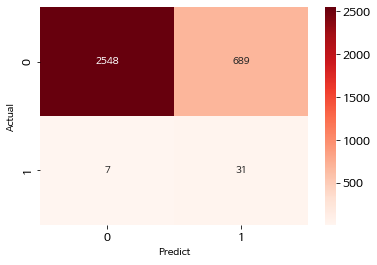

[[2548  689]
 [   7   31]]
accuracy 0.787
precision :  0.043
recall :  0.816
f1_score :  0.082
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'under', 'lg', array([[2548,  689],
       [   7,   31]]), 0.787, 0.043, 0.816, 0.816, 'none']
3. RUSE


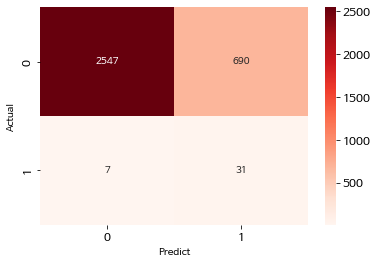

[[2547  690]
 [   7   31]]
accuracy 0.787
precision :  0.043
recall :  0.816
f1_score :  0.082
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'under', 'sgd', array([[2547,  690],
       [   7,   31]]), 0.787, 0.043, 0.816, 0.816, 'none']
3. RUSE


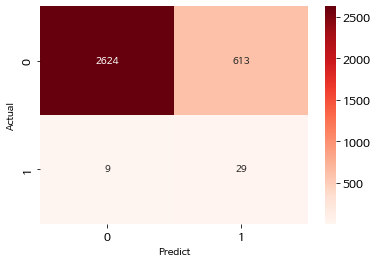

[[2624  613]
 [   9   29]]
accuracy 0.81
precision :  0.045
recall :  0.763
f1_score :  0.085
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'under', 'knn', array([[2624,  613],
       [   9,   29]]), 0.81, 0.045, 0.763, 0.763, 'none']
3. RUSE


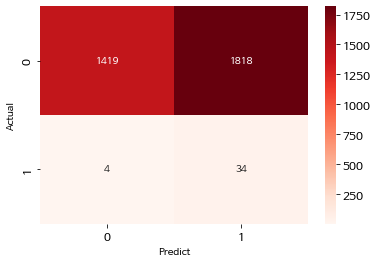

[[1419 1818]
 [   4   34]]
accuracy 0.444
precision :  0.018
recall :  0.895
f1_score :  0.036
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'under', 'svm', array([[1419, 1818],
       [   4,   34]]), 0.444, 0.018, 0.895, 0.895, 'none']
3. RUSE


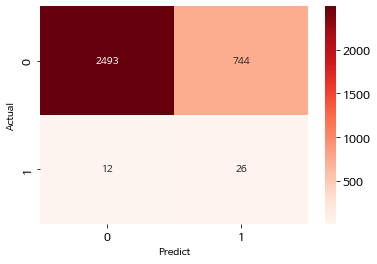

[[2493  744]
 [  12   26]]
accuracy 0.769
precision :  0.034
recall :  0.684
f1_score :  0.064
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'under', 'dt', array([[2493,  744],
       [  12,   26]]), 0.769, 0.034, 0.684, 0.684, 'none']
3. RUSE


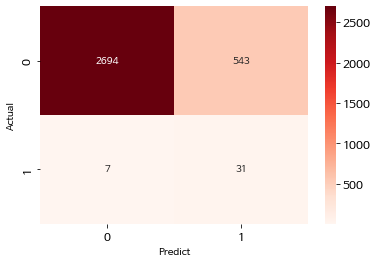

[[2694  543]
 [   7   31]]
accuracy 0.832
precision :  0.054
recall :  0.816
f1_score :  0.101
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'under', 'pr', array([[2694,  543],
       [   7,   31]]), 0.832, 0.054, 0.816, 0.816, 'none']
3. RUSE


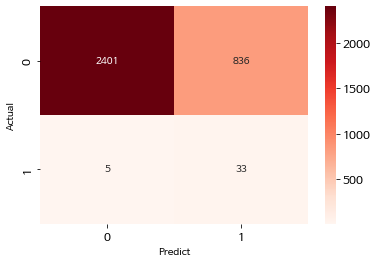

[[2401  836]
 [   5   33]]
accuracy 0.743
precision :  0.038
recall :  0.868
f1_score :  0.073
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'under', 'rf', array([[2401,  836],
       [   5,   33]]), 0.743, 0.038, 0.868, 0.868, 'none']
3. ROSE


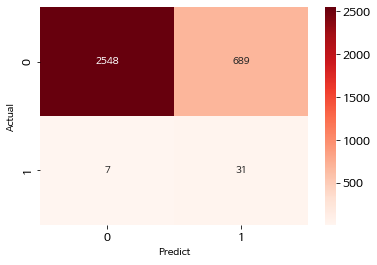

[[2548  689]
 [   7   31]]
accuracy 0.787
precision :  0.043
recall :  0.816
f1_score :  0.082
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'over', 'lg', array([[2548,  689],
       [   7,   31]]), 0.787, 0.043, 0.816, 0.816, 'none']
3. ROSE


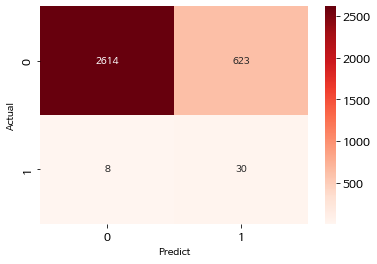

[[2614  623]
 [   8   30]]
accuracy 0.807
precision :  0.046
recall :  0.789
f1_score :  0.087
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'over', 'sgd', array([[2614,  623],
       [   8,   30]]), 0.807, 0.046, 0.789, 0.789, 'none']
3. ROSE


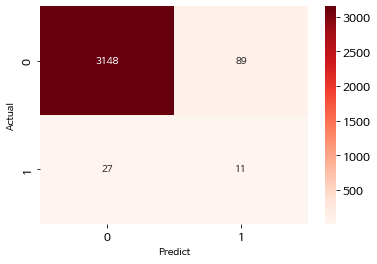

[[3148   89]
 [  27   11]]
accuracy 0.965
precision :  0.11
recall :  0.289
f1_score :  0.159
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'over', 'knn', array([[3148,   89],
       [  27,   11]]), 0.965, 0.11, 0.289, 0.289, 'none']
3. ROSE


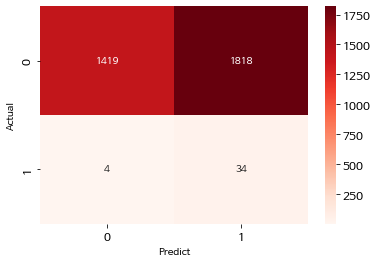

[[1419 1818]
 [   4   34]]
accuracy 0.444
precision :  0.018
recall :  0.895
f1_score :  0.036
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'over', 'svm', array([[1419, 1818],
       [   4,   34]]), 0.444, 0.018, 0.895, 0.895, 'none']
3. ROSE


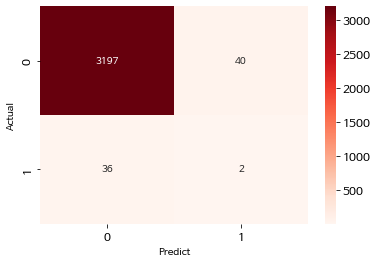

[[3197   40]
 [  36    2]]
accuracy 0.977
precision :  0.048
recall :  0.053
f1_score :  0.05
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'over', 'dt', array([[3197,   40],
       [  36,    2]]), 0.977, 0.048, 0.053, 0.053, 'none']
3. ROSE


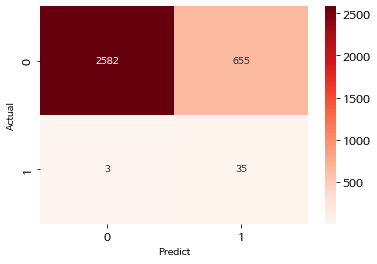

[[2582  655]
 [   3   35]]
accuracy 0.799
precision :  0.051
recall :  0.921
f1_score :  0.096
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'over', 'pr', array([[2582,  655],
       [   3,   35]]), 0.799, 0.051, 0.921, 0.921, 'none']
3. ROSE


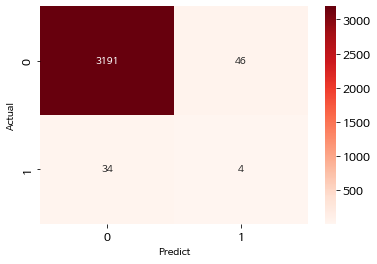

[[3191   46]
 [  34    4]]
accuracy 0.976
precision :  0.08
recall :  0.105
f1_score :  0.091
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'over', 'rf', array([[3191,   46],
       [  34,    4]]), 0.976, 0.08, 0.105, 0.105, 'none']
3. SMOTE


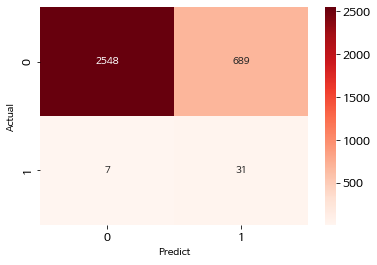

[[2548  689]
 [   7   31]]
accuracy 0.787
precision :  0.043
recall :  0.816
f1_score :  0.082
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'smote', 'lg', array([[2548,  689],
       [   7,   31]]), 0.787, 0.043, 0.816, 0.816, 'none']
3. SMOTE


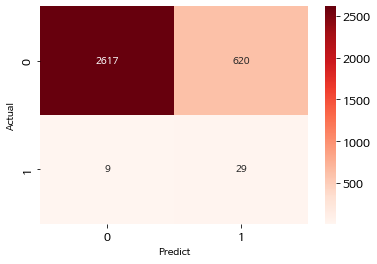

[[2617  620]
 [   9   29]]
accuracy 0.808
precision :  0.045
recall :  0.763
f1_score :  0.084
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'smote', 'sgd', array([[2617,  620],
       [   9,   29]]), 0.808, 0.045, 0.763, 0.763, 'none']
3. SMOTE


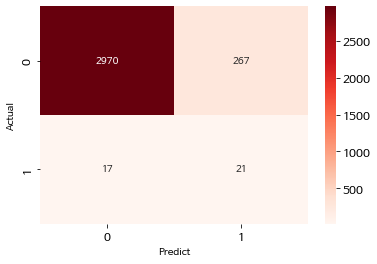

[[2970  267]
 [  17   21]]
accuracy 0.913
precision :  0.073
recall :  0.553
f1_score :  0.129
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'smote', 'knn', array([[2970,  267],
       [  17,   21]]), 0.913, 0.073, 0.553, 0.553, 'none']
3. SMOTE


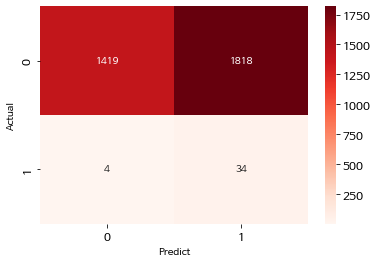

[[1419 1818]
 [   4   34]]
accuracy 0.444
precision :  0.018
recall :  0.895
f1_score :  0.036
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'smote', 'svm', array([[1419, 1818],
       [   4,   34]]), 0.444, 0.018, 0.895, 0.895, 'none']
3. SMOTE


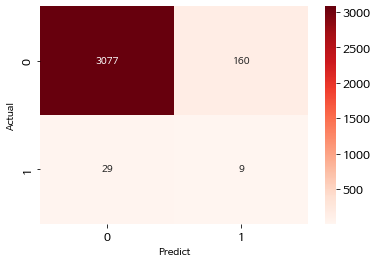

[[3077  160]
 [  29    9]]
accuracy 0.942
precision :  0.053
recall :  0.237
f1_score :  0.087
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'smote', 'dt', array([[3077,  160],
       [  29,    9]]), 0.942, 0.053, 0.237, 0.237, 'none']
3. SMOTE


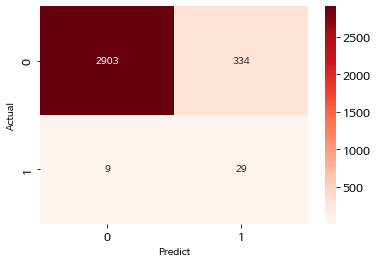

[[2903  334]
 [   9   29]]
accuracy 0.895
precision :  0.08
recall :  0.763
f1_score :  0.145
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'smote', 'pr', array([[2903,  334],
       [   9,   29]]), 0.895, 0.08, 0.763, 0.763, 'none']
3. SMOTE


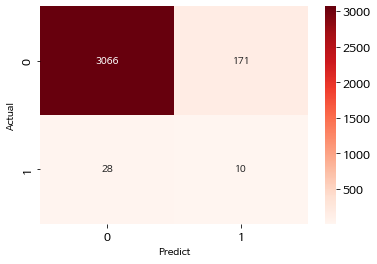

[[3066  171]
 [  28   10]]
accuracy 0.939
precision :  0.055
recall :  0.263
f1_score :  0.091
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'smote', 'rf', array([[3066,  171],
       [  28,   10]]), 0.939, 0.055, 0.263, 0.263, 'none']


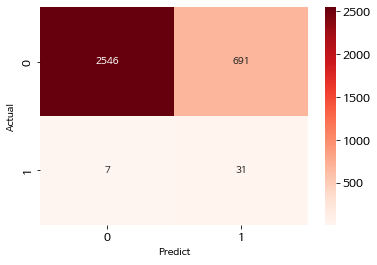

[[2546  691]
 [   7   31]]
accuracy 0.787
precision :  0.043
recall :  0.816
f1_score :  0.082
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'None', 'lg', array([[2546,  691],
       [   7,   31]]), 0.787, 0.043, 0.816, 0.816, 'none']


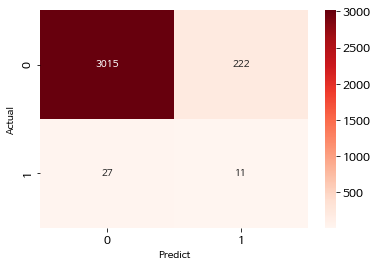

[[3015  222]
 [  27   11]]
accuracy 0.924
precision :  0.047
recall :  0.289
f1_score :  0.081
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'None', 'sgd', array([[3015,  222],
       [  27,   11]]), 0.924, 0.047, 0.289, 0.289, 'none']


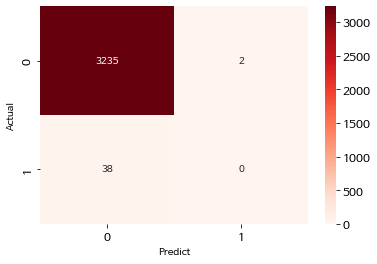

[[3235    2]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'None', 'knn', array([[3235,    2],
       [  38,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


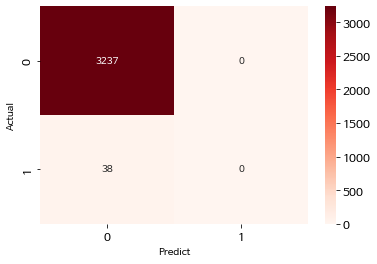

[[3237    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'None', 'svm', array([[3237,    0],
       [  38,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


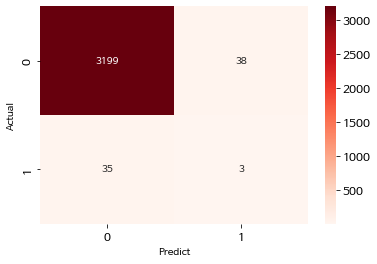

[[3199   38]
 [  35    3]]
accuracy 0.978
precision :  0.073
recall :  0.079
f1_score :  0.076
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'None', 'dt', array([[3199,   38],
       [  35,    3]]), 0.978, 0.073, 0.079, 0.079, 'none']


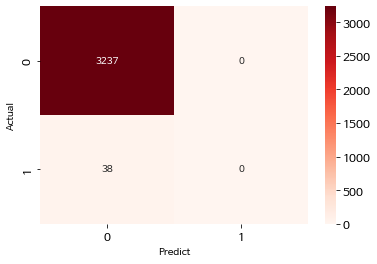

[[3237    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'None', 'pr', array([[3237,    0],
       [  38,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


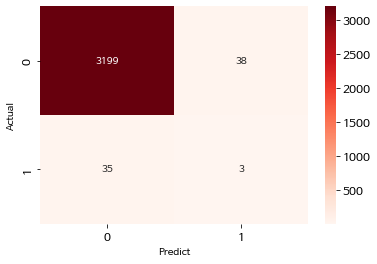

[[3199   38]
 [  35    3]]
accuracy 0.978
precision :  0.073
recall :  0.079
f1_score :  0.076
******** ['basic_final_df', 'Y', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '기업순이익률', '자기자본증가율', '수지비율', '재고자산 대 유동자산비율', '이자보상배율(순금융비용)', '단기차입금 대 총차입금비율', '외환이익 대 매출액비율', '비유동부채비율', '비유동비율', '유동부채비율', '비유동장기적합률', '부채비율', '총자본영업이익률', '총자본사업이익률', '타인자본회전률', '경영자본순이익률', 'EPS(Earning Per Share)(원)', 'CASH FLOW 대 매출액비율', '차입금의존도', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'CASH FLOW 대 부채비율'], 'None', 'rf', array([[3199,   38],
       [  35,    3]]), 0.978, 0.073, 0.079, 0.079, 'none']
1. split_by_R
****************
등분산성을 만족하는 feature 개수는 141개 입니다.
이분산성을 만족하는 feature 개수는 16개 입니다.
등분산성을 만족한 141개 feature에 대해 z_test를 시행합니다.
141개를 z-test 시행한 결과 52개가 출력되었습니다.
이분산성을 만족한 16개 feature에 대해 welch's t-test를 시행합니다.
16개를 z-test 시행한 결과 6개가 출력되었습니다.
위 결과를 합친 feature 총 58개에 대해 단변량 로짓 분석을 시행합니다.
단변량로짓으로 돌린 결과 57개가 추출됨
3. RUSE


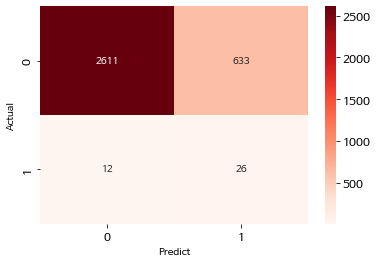

[[2611  633]
 [  12   26]]
accuracy 0.803
precision :  0.039
recall :  0.684
f1_score :  0.075
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'under', 'lg', array([[2611,  633],
       [  12,   26]]), 0.803, 0.039, 0.684, 0.684, 'none']
3. RUSE


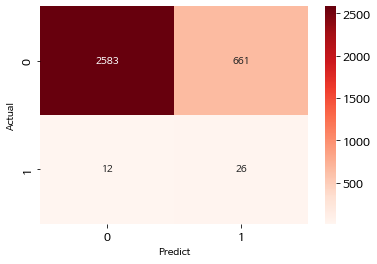

[[2583  661]
 [  12   26]]
accuracy 0.795
precision :  0.038
recall :  0.684
f1_score :  0.072
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'under', 'sgd', array([[2583,  661],
       [  12,   26]]), 0.795, 0.038, 0.684, 0.684, 'none']
3. RUSE


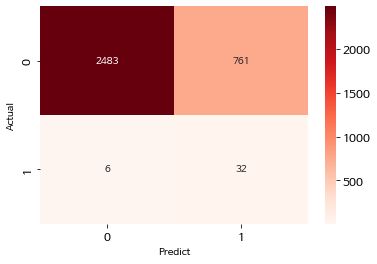

[[2483  761]
 [   6   32]]
accuracy 0.766
precision :  0.04
recall :  0.842
f1_score :  0.077
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'under', 'knn', array([[2483,  761],
       [   6,   32]]), 0.766, 0.04, 0.842, 0.842, 'none']
3. RUSE


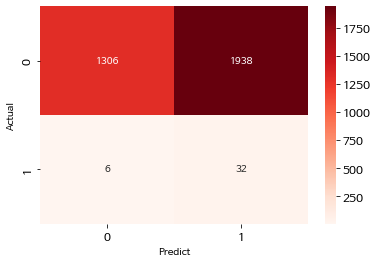

[[1306 1938]
 [   6   32]]
accuracy 0.408
precision :  0.016
recall :  0.842
f1_score :  0.032
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'under', 'svm', array([[1306, 1938],
       [   6,   32]]), 0.408, 0.016, 0.842, 0.842, 'none']
3. RUSE


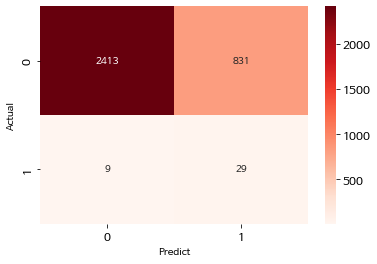

[[2413  831]
 [   9   29]]
accuracy 0.744
precision :  0.034
recall :  0.763
f1_score :  0.065
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'under', 'dt', array([[2413,  831],
       [   9,   29]]), 0.744, 0.034, 0.763, 0.763, 'none']
3. RUSE


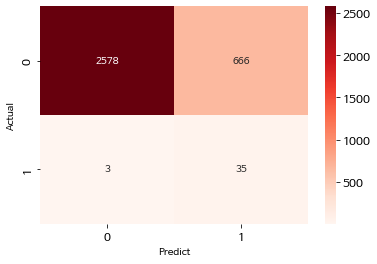

[[2578  666]
 [   3   35]]
accuracy 0.796
precision :  0.05
recall :  0.921
f1_score :  0.095
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'under', 'pr', array([[2578,  666],
       [   3,   35]]), 0.796, 0.05, 0.921, 0.921, 'none']
3. RUSE


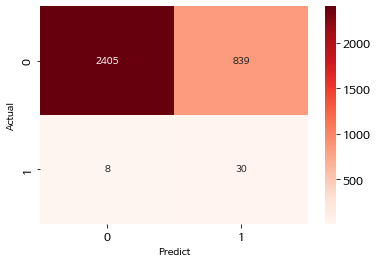

[[2405  839]
 [   8   30]]
accuracy 0.742
precision :  0.035
recall :  0.789
f1_score :  0.066
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'under', 'rf', array([[2405,  839],
       [   8,   30]]), 0.742, 0.035, 0.789, 0.789, 'none']
3. ROSE


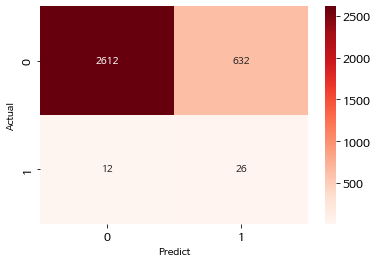

[[2612  632]
 [  12   26]]
accuracy 0.804
precision :  0.04
recall :  0.684
f1_score :  0.075
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'over', 'lg', array([[2612,  632],
       [  12,   26]]), 0.804, 0.04, 0.684, 0.684, 'none']
3. ROSE


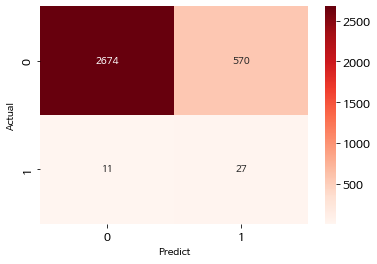

[[2674  570]
 [  11   27]]
accuracy 0.823
precision :  0.045
recall :  0.711
f1_score :  0.085
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'over', 'sgd', array([[2674,  570],
       [  11,   27]]), 0.823, 0.045, 0.711, 0.711, 'none']
3. ROSE


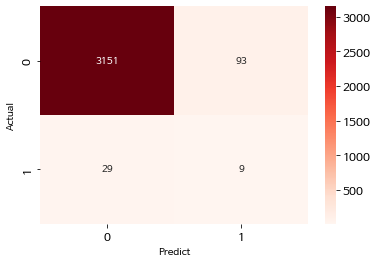

[[3151   93]
 [  29    9]]
accuracy 0.963
precision :  0.088
recall :  0.237
f1_score :  0.129
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'over', 'knn', array([[3151,   93],
       [  29,    9]]), 0.963, 0.088, 0.237, 0.237, 'none']
3. ROSE


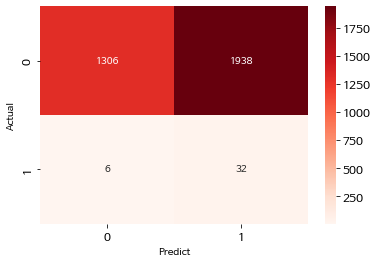

[[1306 1938]
 [   6   32]]
accuracy 0.408
precision :  0.016
recall :  0.842
f1_score :  0.032
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'over', 'svm', array([[1306, 1938],
       [   6,   32]]), 0.408, 0.016, 0.842, 0.842, 'none']
3. ROSE


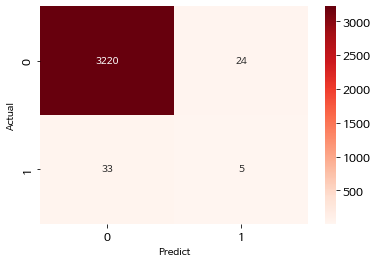

[[3220   24]
 [  33    5]]
accuracy 0.983
precision :  0.172
recall :  0.132
f1_score :  0.149
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'over', 'dt', array([[3220,   24],
       [  33,    5]]), 0.983, 0.172, 0.132, 0.132, 'none']
3. ROSE


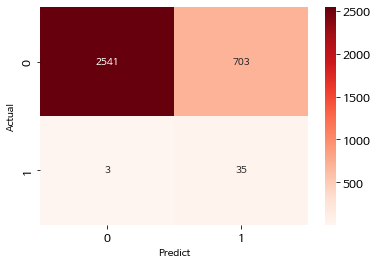

[[2541  703]
 [   3   35]]
accuracy 0.785
precision :  0.047
recall :  0.921
f1_score :  0.09
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'over', 'pr', array([[2541,  703],
       [   3,   35]]), 0.785, 0.047, 0.921, 0.921, 'none']
3. ROSE


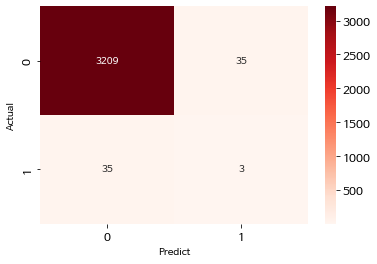

[[3209   35]
 [  35    3]]
accuracy 0.979
precision :  0.079
recall :  0.079
f1_score :  0.079
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'over', 'rf', array([[3209,   35],
       [  35,    3]]), 0.979, 0.079, 0.079, 0.079, 'none']
3. SMOTE


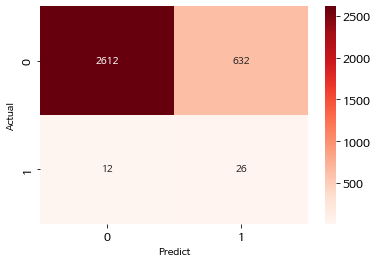

[[2612  632]
 [  12   26]]
accuracy 0.804
precision :  0.04
recall :  0.684
f1_score :  0.075
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'smote', 'lg', array([[2612,  632],
       [  12,   26]]), 0.804, 0.04, 0.684, 0.684, 'none']
3. SMOTE


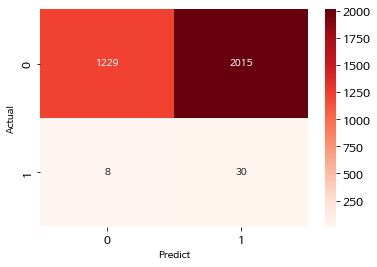

[[1229 2015]
 [   8   30]]
accuracy 0.384
precision :  0.015
recall :  0.789
f1_score :  0.029
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'smote', 'sgd', array([[1229, 2015],
       [   8,   30]]), 0.384, 0.015, 0.789, 0.789, 'none']
3. SMOTE


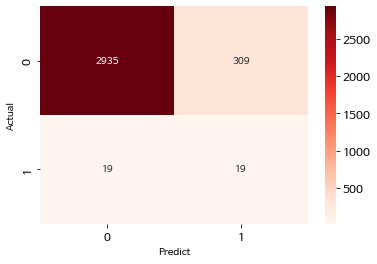

[[2935  309]
 [  19   19]]
accuracy 0.9
precision :  0.058
recall :  0.5
f1_score :  0.104
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'smote', 'knn', array([[2935,  309],
       [  19,   19]]), 0.9, 0.058, 0.5, 0.5, 'none']
3. SMOTE


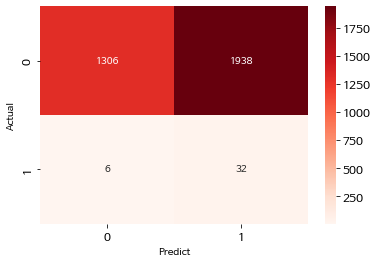

[[1306 1938]
 [   6   32]]
accuracy 0.408
precision :  0.016
recall :  0.842
f1_score :  0.032
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'smote', 'svm', array([[1306, 1938],
       [   6,   32]]), 0.408, 0.016, 0.842, 0.842, 'none']
3. SMOTE


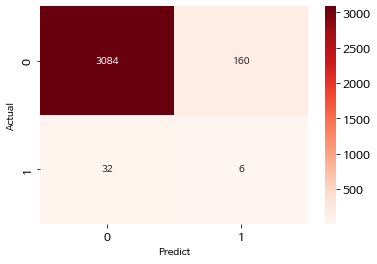

[[3084  160]
 [  32    6]]
accuracy 0.941
precision :  0.036
recall :  0.158
f1_score :  0.059
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'smote', 'dt', array([[3084,  160],
       [  32,    6]]), 0.941, 0.036, 0.158, 0.158, 'none']
3. SMOTE


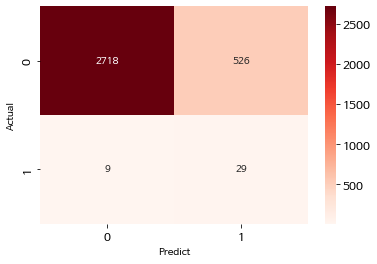

[[2718  526]
 [   9   29]]
accuracy 0.837
precision :  0.052
recall :  0.763
f1_score :  0.098
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'smote', 'pr', array([[2718,  526],
       [   9,   29]]), 0.837, 0.052, 0.763, 0.763, 'none']
3. SMOTE


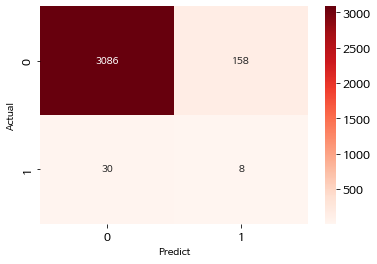

[[3086  158]
 [  30    8]]
accuracy 0.943
precision :  0.048
recall :  0.211
f1_score :  0.078
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'smote', 'rf', array([[3086,  158],
       [  30,    8]]), 0.943, 0.048, 0.211, 0.211, 'none']


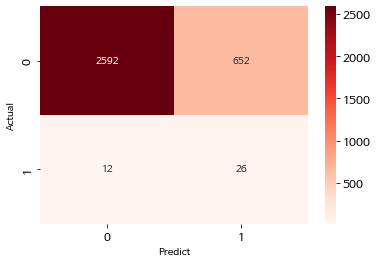

[[2592  652]
 [  12   26]]
accuracy 0.798
precision :  0.038
recall :  0.684
f1_score :  0.073
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'None', 'lg', array([[2592,  652],
       [  12,   26]]), 0.798, 0.038, 0.684, 0.684, 'none']


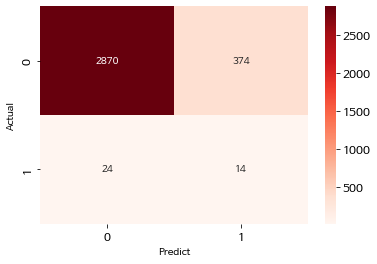

[[2870  374]
 [  24   14]]
accuracy 0.879
precision :  0.036
recall :  0.368
f1_score :  0.066
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'None', 'sgd', array([[2870,  374],
       [  24,   14]]), 0.879, 0.036, 0.368, 0.368, 'none']


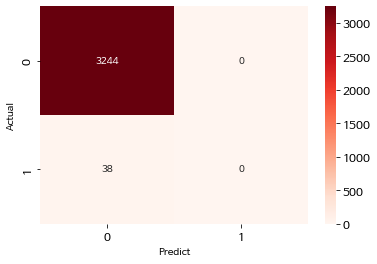

[[3244    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'None', 'knn', array([[3244,    0],
       [  38,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


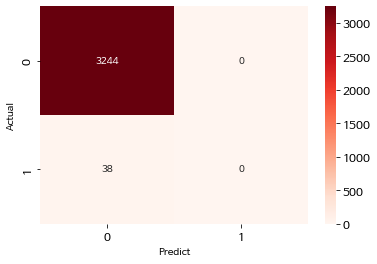

[[3244    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'None', 'svm', array([[3244,    0],
       [  38,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


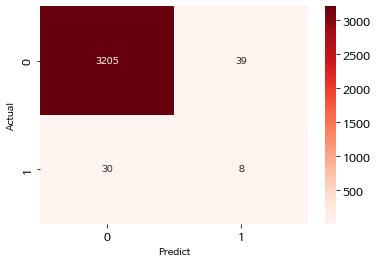

[[3205   39]
 [  30    8]]
accuracy 0.979
precision :  0.17
recall :  0.211
f1_score :  0.188
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'None', 'dt', array([[3205,   39],
       [  30,    8]]), 0.979, 0.17, 0.211, 0.211, 'none']


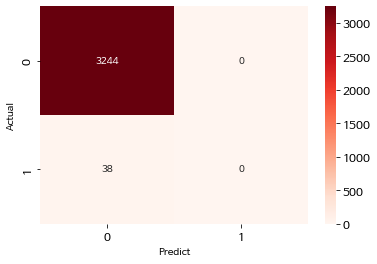

[[3244    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'None', 'pr', array([[3244,    0],
       [  38,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


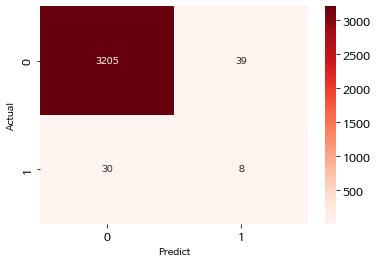

[[3205   39]
 [  30    8]]
accuracy 0.979
precision :  0.17
recall :  0.211
f1_score :  0.188
******** ['basic_final_df', 'R', 't_Y', 'forward', ['총자본순이익률', '적립금비율(재정비율)', '기업순이익률', 'CASH FLOW 대 총자본비율', '자기자본순이익률', '자기자본증가율', '재고자산 대 유동자산비율', '종업원1인당 부가가치(백만원).1', '종업원1인당 부가가치(백만원)', '외환이익 대 매출액비율', '단기차입금 대 총차입금비율', '이자보상배율(순금융비용)', '종업원1인당 인건비(백만원)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '타인자본회전률', '유동자산회전률', '영업외손익률', '사내유보 대 자기자본비율', '순운전자본비율', 'PBR(Price book-value ratio)(최저)', '종업원1인당 인건비증가율'], 'None', 'rf', array([[3205,   39],
       [  30,    8]]), 0.979, 0.17, 0.211, 0.211, 'none']
1. split_by_Y
****************
등분산성을 만족하는 feature 개수는 133개 입니다.
이분산성을 만족하는 feature 개수는 24개 입니다.
등분산성을 만족한 133개 feature에 대해 z_test를 시행합니다.
133개를 z-test 시행한 결과 100개가 출력되었습니다.
이분산성을 만족한 24개 feature에 대해 welch's t-test를 시행합니다.
24개를 z-test 시행한 결과 10개가 출력되었습니다.
위 결과를 합친 feature 총 110개에 대해 단변량 로짓 분석을 시행합니다.
단변량로짓으로 돌린 결과 105개가 추출됨
3. RUSE


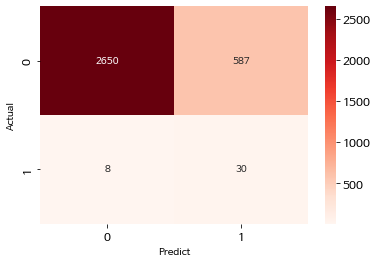

[[2650  587]
 [   8   30]]
accuracy 0.818
precision :  0.049
recall :  0.789
f1_score :  0.092
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'under', 'lg', array([[2650,  587],
       [   8,   30]]), 0.818, 0.049, 0.789, 0.789, 'none']
3. RUSE


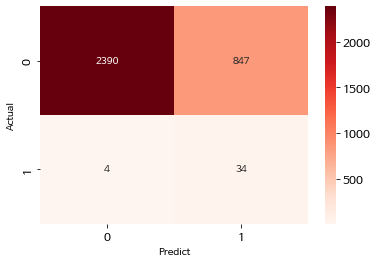

[[2390  847]
 [   4   34]]
accuracy 0.74
precision :  0.039
recall :  0.895
f1_score :  0.074
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'under', 'sgd', array([[2390,  847],
       [   4,   34]]), 0.74, 0.039, 0.895, 0.895, 'none']
3. RUSE


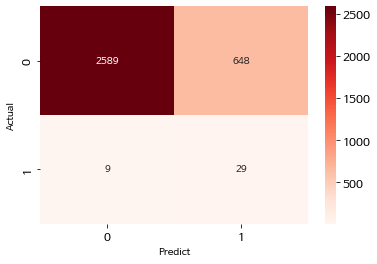

[[2589  648]
 [   9   29]]
accuracy 0.799
precision :  0.043
recall :  0.763
f1_score :  0.081
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'under', 'knn', array([[2589,  648],
       [   9,   29]]), 0.799, 0.043, 0.763, 0.763, 'none']
3. RUSE


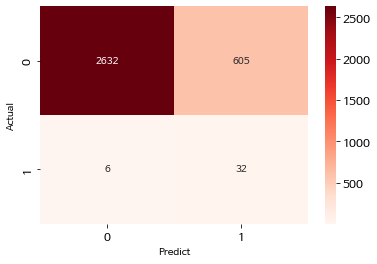

[[2632  605]
 [   6   32]]
accuracy 0.813
precision :  0.05
recall :  0.842
f1_score :  0.095
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'under', 'svm', array([[2632,  605],
       [   6,   32]]), 0.813, 0.05, 0.842, 0.842, 'none']
3. RUSE


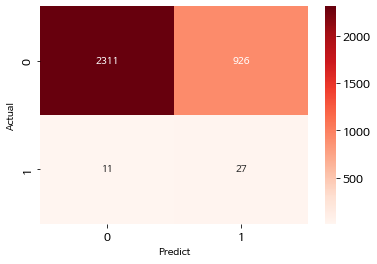

[[2311  926]
 [  11   27]]
accuracy 0.714
precision :  0.028
recall :  0.711
f1_score :  0.054
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'under', 'dt', array([[2311,  926],
       [  11,   27]]), 0.714, 0.028, 0.711, 0.711, 'none']
3. RUSE


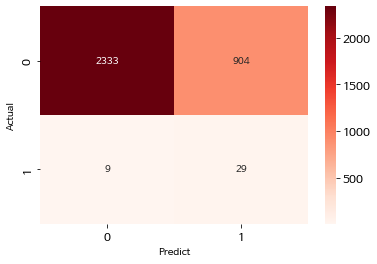

[[2333  904]
 [   9   29]]
accuracy 0.721
precision :  0.031
recall :  0.763
f1_score :  0.06
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'under', 'pr', array([[2333,  904],
       [   9,   29]]), 0.721, 0.031, 0.763, 0.763, 'none']
3. RUSE


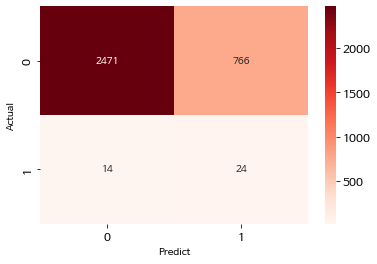

[[2471  766]
 [  14   24]]
accuracy 0.762
precision :  0.03
recall :  0.632
f1_score :  0.058
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'under', 'rf', array([[2471,  766],
       [  14,   24]]), 0.762, 0.03, 0.632, 0.632, 'none']
3. ROSE


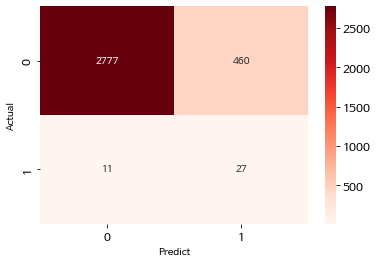

[[2777  460]
 [  11   27]]
accuracy 0.856
precision :  0.055
recall :  0.711
f1_score :  0.103
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'over', 'lg', array([[2777,  460],
       [  11,   27]]), 0.856, 0.055, 0.711, 0.711, 'none']
3. ROSE


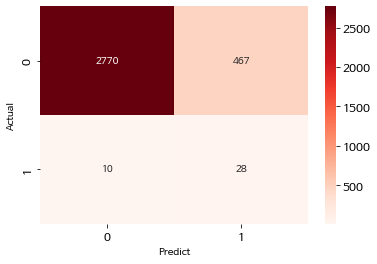

[[2770  467]
 [  10   28]]
accuracy 0.854
precision :  0.057
recall :  0.737
f1_score :  0.105
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'over', 'sgd', array([[2770,  467],
       [  10,   28]]), 0.854, 0.057, 0.737, 0.737, 'none']
3. ROSE


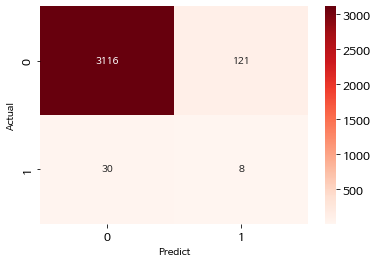

[[3116  121]
 [  30    8]]
accuracy 0.954
precision :  0.062
recall :  0.211
f1_score :  0.096
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'over', 'knn', array([[3116,  121],
       [  30,    8]]), 0.954, 0.062, 0.211, 0.211, 'none']
3. ROSE


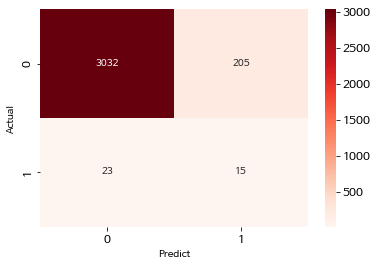

[[3032  205]
 [  23   15]]
accuracy 0.93
precision :  0.068
recall :  0.395
f1_score :  0.116
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'over', 'svm', array([[3032,  205],
       [  23,   15]]), 0.93, 0.068, 0.395, 0.395, 'none']
3. ROSE


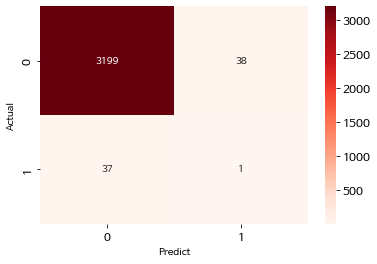

[[3199   38]
 [  37    1]]
accuracy 0.977
precision :  0.026
recall :  0.026
f1_score :  0.026
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'over', 'dt', array([[3199,   38],
       [  37,    1]]), 0.977, 0.026, 0.026, 0.026, 'none']
3. ROSE


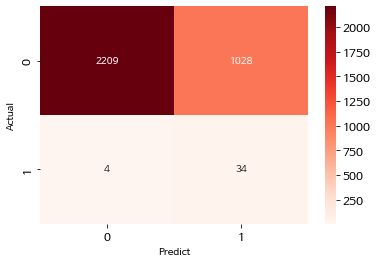

[[2209 1028]
 [   4   34]]
accuracy 0.685
precision :  0.032
recall :  0.895
f1_score :  0.062
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'over', 'pr', array([[2209, 1028],
       [   4,   34]]), 0.685, 0.032, 0.895, 0.895, 'none']
3. ROSE


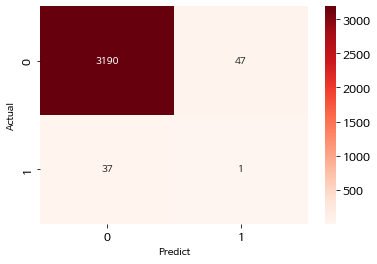

[[3190   47]
 [  37    1]]
accuracy 0.974
precision :  0.021
recall :  0.026
f1_score :  0.023
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'over', 'rf', array([[3190,   47],
       [  37,    1]]), 0.974, 0.021, 0.026, 0.026, 'none']
3. SMOTE


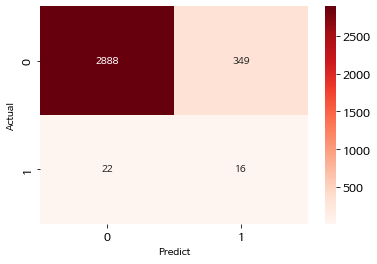

[[2888  349]
 [  22   16]]
accuracy 0.887
precision :  0.044
recall :  0.421
f1_score :  0.079
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'smote', 'lg', array([[2888,  349],
       [  22,   16]]), 0.887, 0.044, 0.421, 0.421, 'none']
3. SMOTE


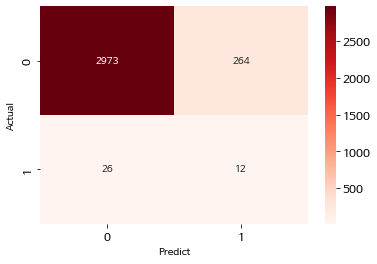

[[2973  264]
 [  26   12]]
accuracy 0.911
precision :  0.043
recall :  0.316
f1_score :  0.076
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'smote', 'sgd', array([[2973,  264],
       [  26,   12]]), 0.911, 0.043, 0.316, 0.316, 'none']
3. SMOTE


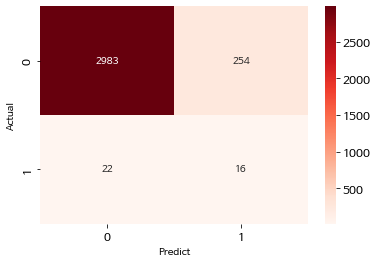

[[2983  254]
 [  22   16]]
accuracy 0.916
precision :  0.059
recall :  0.421
f1_score :  0.104
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'smote', 'knn', array([[2983,  254],
       [  22,   16]]), 0.916, 0.059, 0.421, 0.421, 'none']
3. SMOTE


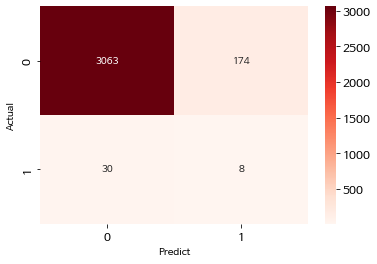

[[3063  174]
 [  30    8]]
accuracy 0.938
precision :  0.044
recall :  0.211
f1_score :  0.073
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'smote', 'svm', array([[3063,  174],
       [  30,    8]]), 0.938, 0.044, 0.211, 0.211, 'none']
3. SMOTE


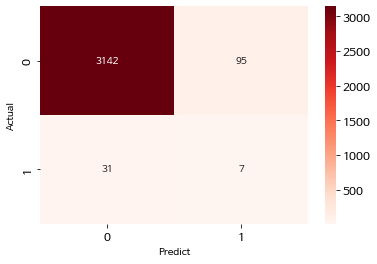

[[3142   95]
 [  31    7]]
accuracy 0.962
precision :  0.069
recall :  0.184
f1_score :  0.1
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'smote', 'dt', array([[3142,   95],
       [  31,    7]]), 0.962, 0.069, 0.184, 0.184, 'none']
3. SMOTE


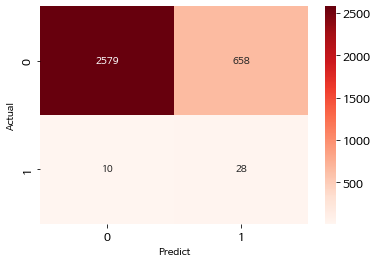

[[2579  658]
 [  10   28]]
accuracy 0.796
precision :  0.041
recall :  0.737
f1_score :  0.077
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'smote', 'pr', array([[2579,  658],
       [  10,   28]]), 0.796, 0.041, 0.737, 0.737, 'none']
3. SMOTE


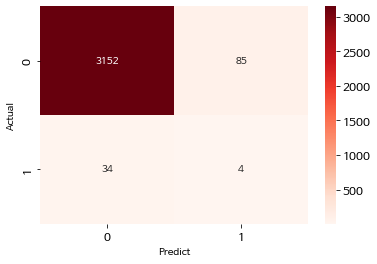

[[3152   85]
 [  34    4]]
accuracy 0.964
precision :  0.045
recall :  0.105
f1_score :  0.063
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'smote', 'rf', array([[3152,   85],
       [  34,    4]]), 0.964, 0.045, 0.105, 0.105, 'none']


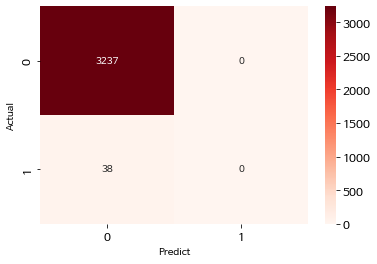

[[3237    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'None', 'lg', array([[3237,    0],
       [  38,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


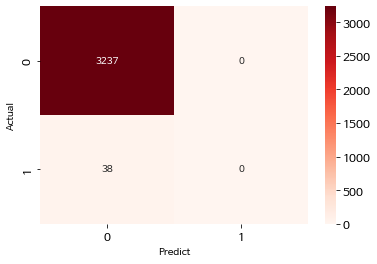

[[3237    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'None', 'sgd', array([[3237,    0],
       [  38,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


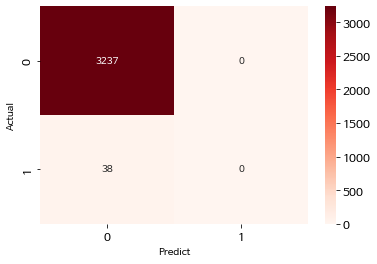

[[3237    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'None', 'knn', array([[3237,    0],
       [  38,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


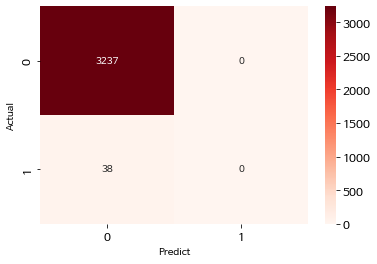

[[3237    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'None', 'svm', array([[3237,    0],
       [  38,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


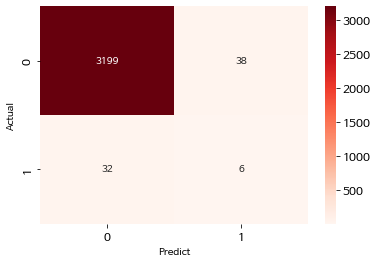

[[3199   38]
 [  32    6]]
accuracy 0.979
precision :  0.136
recall :  0.158
f1_score :  0.146
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'None', 'dt', array([[3199,   38],
       [  32,    6]]), 0.979, 0.136, 0.158, 0.158, 'none']


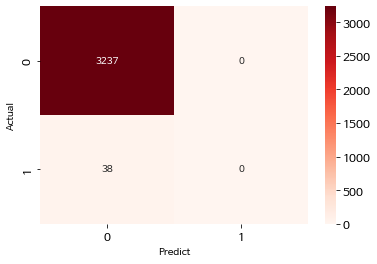

[[3237    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'None', 'pr', array([[3237,    0],
       [  38,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


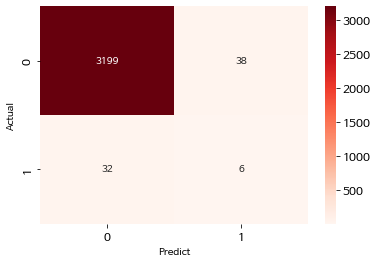

[[3199   38]
 [  32    6]]
accuracy 0.979
precision :  0.136
recall :  0.158
f1_score :  0.146
******** ['JH_binning_8', 'Y', 't_Y', 'forward', ['총자본순이익률', '사내유보 대 자기자본비율', '영업외손익률', '유동부채비율', 'EBITDA/매출액(%)', 'CASH FLOW 대 매출액비율', '자본분배율', '자기자본영업이익률', '종업원1인당 순이익(백만원)', '경영자본순이익률', '비유동자산증가율', '비유동자산집중도', '유동자산집중도', '투자집중도', '종업원1인당 인건비증가율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', 'EPS(Earning Per Share)(원)', '매입채무회전기간', '적립금비율(재정비율)', '기계장비율', '차입금평균이자율', '자기자본구성비율', '유보액대비율', '순운전자본회전률', '유동자산회전률', '1주당매출액(원)'], 'None', 'rf', array([[3199,   38],
       [  32,    6]]), 0.979, 0.136, 0.158, 0.158, 'none']
1. split_by_R
****************
등분산성을 만족하는 feature 개수는 135개 입니다.
이분산성을 만족하는 feature 개수는 22개 입니다.
등분산성을 만족한 135개 feature에 대해 z_test를 시행합니다.
135개를 z-test 시행한 결과 101개가 출력되었습니다.
이분산성을 만족한 22개 feature에 대해 welch's t-test를 시행합니다.
22개를 z-test 시행한 결과 8개가 출력되었습니다.
위 결과를 합친 feature 총 109개에 대해 단변량 로짓 분석을 시행합니다.
단변량로짓으로 돌린 결과 107개가 추출됨
3. RUSE


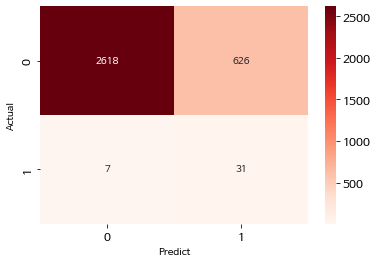

[[2618  626]
 [   7   31]]
accuracy 0.807
precision :  0.047
recall :  0.816
f1_score :  0.089
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'under', 'lg', array([[2618,  626],
       [   7,   31]]), 0.807, 0.047, 0.816, 0.816, 'none']
3. RUSE


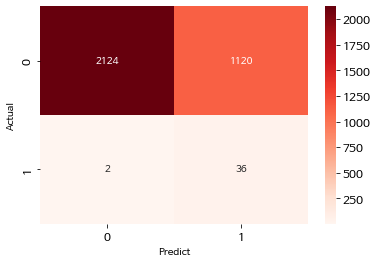

[[2124 1120]
 [   2   36]]
accuracy 0.658
precision :  0.031
recall :  0.947
f1_score :  0.06
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'under', 'sgd', array([[2124, 1120],
       [   2,   36]]), 0.658, 0.031, 0.947, 0.947, 'none']
3. RUSE


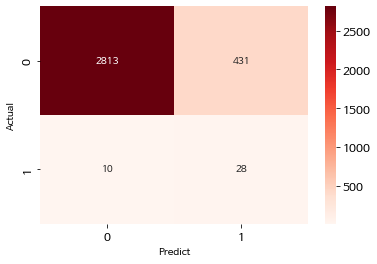

[[2813  431]
 [  10   28]]
accuracy 0.866
precision :  0.061
recall :  0.737
f1_score :  0.113
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'under', 'knn', array([[2813,  431],
       [  10,   28]]), 0.866, 0.061, 0.737, 0.737, 'none']
3. RUSE


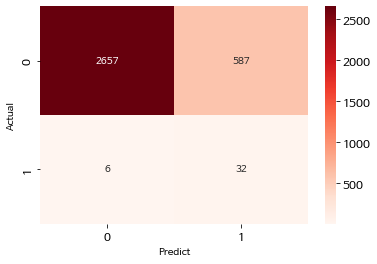

[[2657  587]
 [   6   32]]
accuracy 0.819
precision :  0.052
recall :  0.842
f1_score :  0.097
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'under', 'svm', array([[2657,  587],
       [   6,   32]]), 0.819, 0.052, 0.842, 0.842, 'none']
3. RUSE


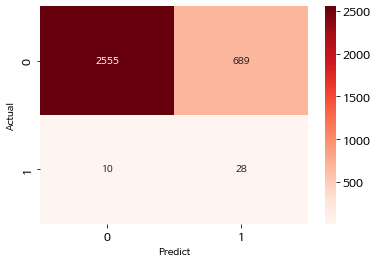

[[2555  689]
 [  10   28]]
accuracy 0.787
precision :  0.039
recall :  0.737
f1_score :  0.074
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'under', 'dt', array([[2555,  689],
       [  10,   28]]), 0.787, 0.039, 0.737, 0.737, 'none']
3. RUSE


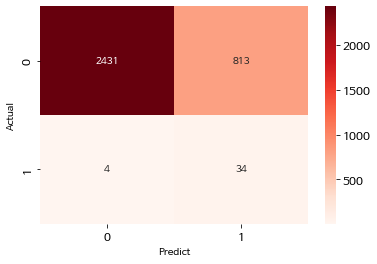

[[2431  813]
 [   4   34]]
accuracy 0.751
precision :  0.04
recall :  0.895
f1_score :  0.077
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'under', 'pr', array([[2431,  813],
       [   4,   34]]), 0.751, 0.04, 0.895, 0.895, 'none']
3. RUSE


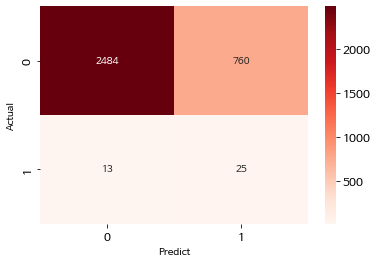

[[2484  760]
 [  13   25]]
accuracy 0.764
precision :  0.032
recall :  0.658
f1_score :  0.061
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'under', 'rf', array([[2484,  760],
       [  13,   25]]), 0.764, 0.032, 0.658, 0.658, 'none']
3. ROSE


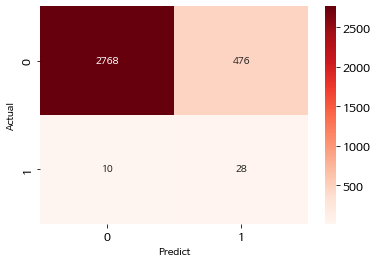

[[2768  476]
 [  10   28]]
accuracy 0.852
precision :  0.056
recall :  0.737
f1_score :  0.103
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'over', 'lg', array([[2768,  476],
       [  10,   28]]), 0.852, 0.056, 0.737, 0.737, 'none']
3. ROSE


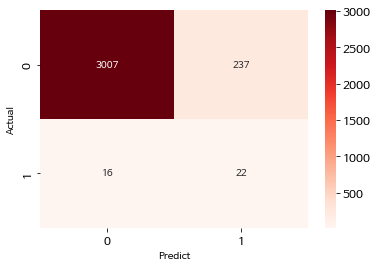

[[3007  237]
 [  16   22]]
accuracy 0.923
precision :  0.085
recall :  0.579
f1_score :  0.148
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'over', 'sgd', array([[3007,  237],
       [  16,   22]]), 0.923, 0.085, 0.579, 0.579, 'none']
3. ROSE


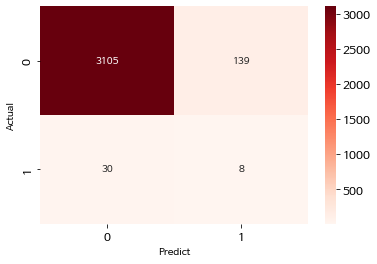

[[3105  139]
 [  30    8]]
accuracy 0.949
precision :  0.054
recall :  0.211
f1_score :  0.086
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'over', 'knn', array([[3105,  139],
       [  30,    8]]), 0.949, 0.054, 0.211, 0.211, 'none']
3. ROSE


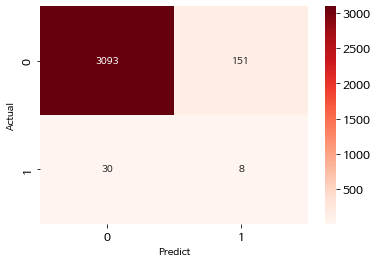

[[3093  151]
 [  30    8]]
accuracy 0.945
precision :  0.05
recall :  0.211
f1_score :  0.081
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'over', 'svm', array([[3093,  151],
       [  30,    8]]), 0.945, 0.05, 0.211, 0.211, 'none']
3. ROSE


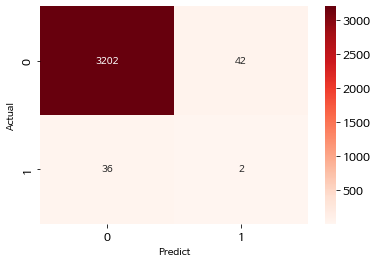

[[3202   42]
 [  36    2]]
accuracy 0.976
precision :  0.045
recall :  0.053
f1_score :  0.049
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'over', 'dt', array([[3202,   42],
       [  36,    2]]), 0.976, 0.045, 0.053, 0.053, 'none']
3. ROSE


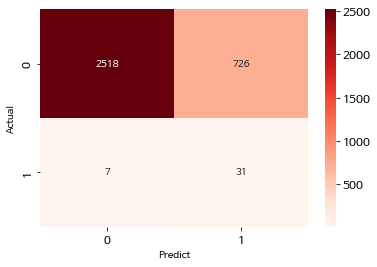

[[2518  726]
 [   7   31]]
accuracy 0.777
precision :  0.041
recall :  0.816
f1_score :  0.078
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'over', 'pr', array([[2518,  726],
       [   7,   31]]), 0.777, 0.041, 0.816, 0.816, 'none']
3. ROSE


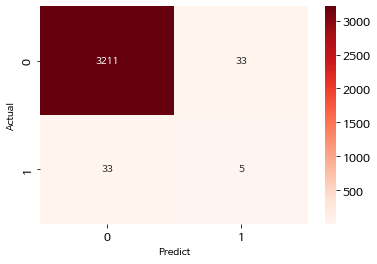

[[3211   33]
 [  33    5]]
accuracy 0.98
precision :  0.132
recall :  0.132
f1_score :  0.132
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'over', 'rf', array([[3211,   33],
       [  33,    5]]), 0.98, 0.132, 0.132, 0.132, 'none']
3. SMOTE


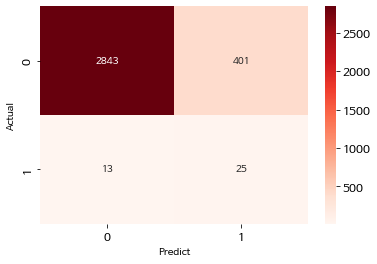

[[2843  401]
 [  13   25]]
accuracy 0.874
precision :  0.059
recall :  0.658
f1_score :  0.108
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'smote', 'lg', array([[2843,  401],
       [  13,   25]]), 0.874, 0.059, 0.658, 0.658, 'none']
3. SMOTE


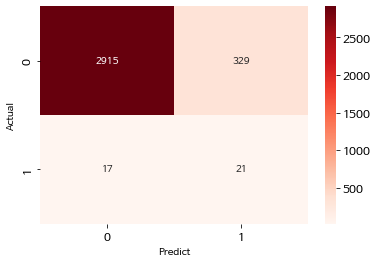

[[2915  329]
 [  17   21]]
accuracy 0.895
precision :  0.06
recall :  0.553
f1_score :  0.108
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'smote', 'sgd', array([[2915,  329],
       [  17,   21]]), 0.895, 0.06, 0.553, 0.553, 'none']
3. SMOTE


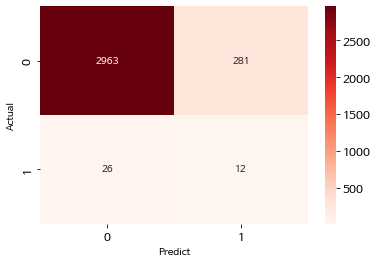

[[2963  281]
 [  26   12]]
accuracy 0.906
precision :  0.041
recall :  0.316
f1_score :  0.073
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'smote', 'knn', array([[2963,  281],
       [  26,   12]]), 0.906, 0.041, 0.316, 0.316, 'none']
3. SMOTE


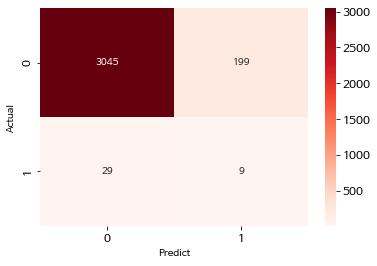

[[3045  199]
 [  29    9]]
accuracy 0.931
precision :  0.043
recall :  0.237
f1_score :  0.073
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'smote', 'svm', array([[3045,  199],
       [  29,    9]]), 0.931, 0.043, 0.237, 0.237, 'none']
3. SMOTE


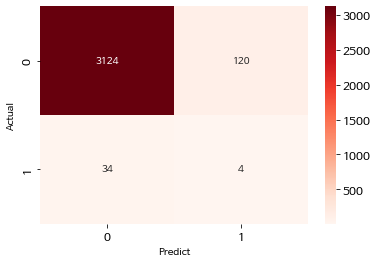

[[3124  120]
 [  34    4]]
accuracy 0.953
precision :  0.032
recall :  0.105
f1_score :  0.049
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'smote', 'dt', array([[3124,  120],
       [  34,    4]]), 0.953, 0.032, 0.105, 0.105, 'none']
3. SMOTE


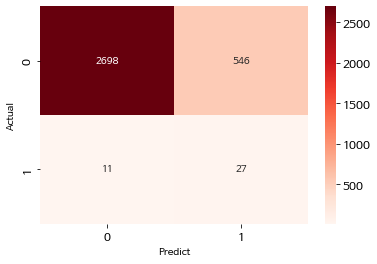

[[2698  546]
 [  11   27]]
accuracy 0.83
precision :  0.047
recall :  0.711
f1_score :  0.088
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'smote', 'pr', array([[2698,  546],
       [  11,   27]]), 0.83, 0.047, 0.711, 0.711, 'none']
3. SMOTE


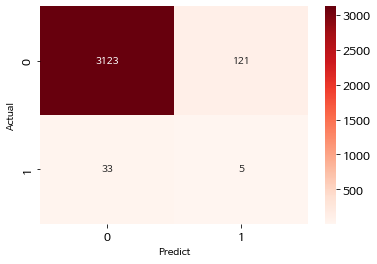

[[3123  121]
 [  33    5]]
accuracy 0.953
precision :  0.04
recall :  0.132
f1_score :  0.061
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'smote', 'rf', array([[3123,  121],
       [  33,    5]]), 0.953, 0.04, 0.132, 0.132, 'none']


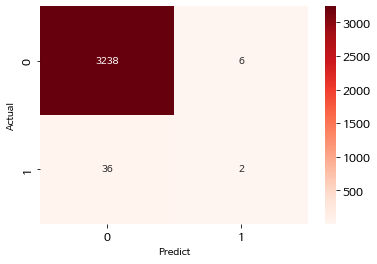

[[3238    6]
 [  36    2]]
accuracy 0.987
precision :  0.25
recall :  0.053
f1_score :  0.087
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'None', 'lg', array([[3238,    6],
       [  36,    2]]), 0.987, 0.25, 0.053, 0.053, 'none']


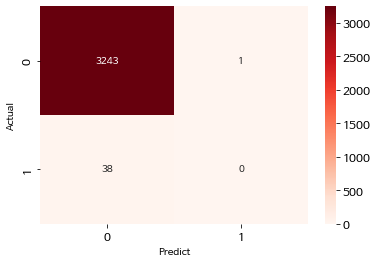

[[3243    1]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'None', 'sgd', array([[3243,    1],
       [  38,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


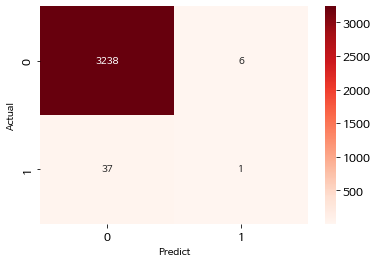

[[3238    6]
 [  37    1]]
accuracy 0.987
precision :  0.143
recall :  0.026
f1_score :  0.044
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'None', 'knn', array([[3238,    6],
       [  37,    1]]), 0.987, 0.143, 0.026, 0.026, 'none']


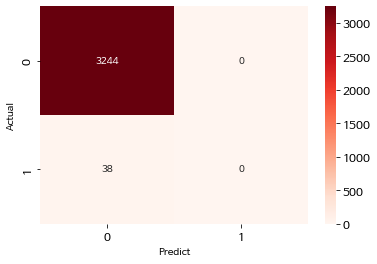

[[3244    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'None', 'svm', array([[3244,    0],
       [  38,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


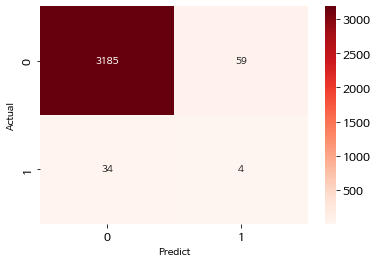

[[3185   59]
 [  34    4]]
accuracy 0.972
precision :  0.063
recall :  0.105
f1_score :  0.079
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'None', 'dt', array([[3185,   59],
       [  34,    4]]), 0.972, 0.063, 0.105, 0.105, 'none']


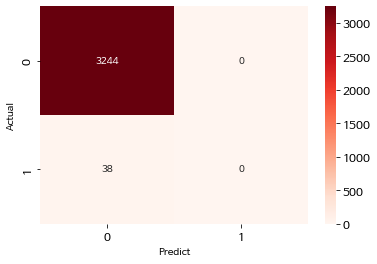

[[3244    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'None', 'pr', array([[3244,    0],
       [  38,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


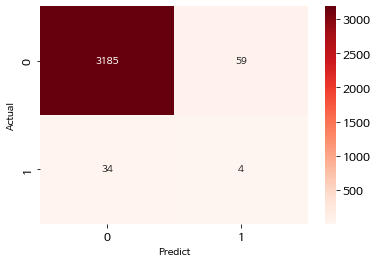

[[3185   59]
 [  34    4]]
accuracy 0.972
precision :  0.063
recall :  0.105
f1_score :  0.079
******** ['JH_binning_8', 'R', 't_Y', 'forward', ['자기자본순이익률', '영업외손익률', '유동부채비율', 'CASH FLOW 대 매출액비율', '사내유보 대 자기자본비율', '자기자본영업이익률', '재고자산증가율', '차입금평균이자율', '단기차입금 대 총차입금비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 총자본비율', '비유동자산집중도', '부가가치율', 'EPS(Earning Per Share)(원)', '비유동자산증가율', '부가가치율.1', '적립금비율(재정비율)', '외환이익 대 매출액비율', '매입채무회전기간', '경영자본순이익률', '자본분배율', '종업원1인당 인건비증가율', '종업원1인당 순이익(백만원)', 'PBR(Price book-value ratio)(최고)', 'PBR(Price book-value ratio)(최저)'], 'None', 'rf', array([[3185,   59],
       [  34,    4]]), 0.972, 0.063, 0.105, 0.105, 'none']
1. split_by_Y
****************
등분산성을 만족하는 feature 개수는 147개 입니다.
이분산성을 만족하는 feature 개수는 10개 입니다.
등분산성을 만족한 147개 feature에 대해 z_test를 시행합니다.
147개를 z-test 시행한 결과 28개가 출력되었습니다.
이분산성을 만족한 10개 feature에 대해 welch's t-test를 시행합니다.
10개를 z-test 시행한 결과 0개가 출력되었습니다.
위 결과를 합친 feature 총 28개에 대해 단변량 로짓 분석을 시행합니다.
단변량로짓으로 돌린 결과 26개가 추출됨
3. RUSE


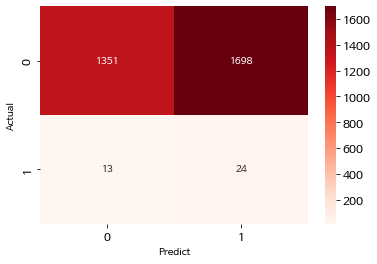

[[1351 1698]
 [  13   24]]
accuracy 0.446
precision :  0.014
recall :  0.649
f1_score :  0.027
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'under', 'lg', array([[1351, 1698],
       [  13,   24]]), 0.446, 0.014, 0.649, 0.649, 'none']
3. RUSE


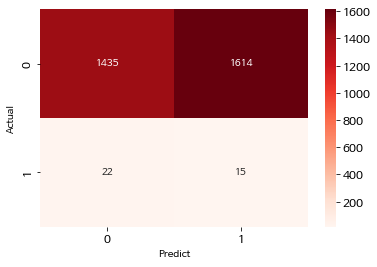

[[1435 1614]
 [  22   15]]
accuracy 0.47
precision :  0.009
recall :  0.405
f1_score :  0.018
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'under', 'sgd', array([[1435, 1614],
       [  22,   15]]), 0.47, 0.009, 0.405, 0.405, 'none']
3. RUSE


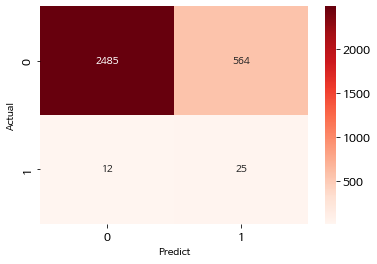

[[2485  564]
 [  12   25]]
accuracy 0.813
precision :  0.042
recall :  0.676
f1_score :  0.08
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'under', 'knn', array([[2485,  564],
       [  12,   25]]), 0.813, 0.042, 0.676, 0.676, 'none']
3. RUSE


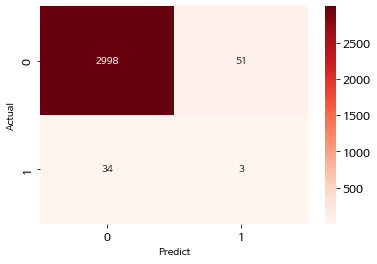

[[2998   51]
 [  34    3]]
accuracy 0.972
precision :  0.056
recall :  0.081
f1_score :  0.066
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'under', 'svm', array([[2998,   51],
       [  34,    3]]), 0.972, 0.056, 0.081, 0.081, 'none']
3. RUSE


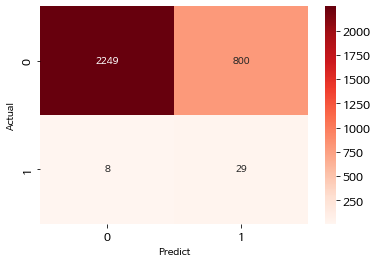

[[2249  800]
 [   8   29]]
accuracy 0.738
precision :  0.035
recall :  0.784
f1_score :  0.067
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'under', 'dt', array([[2249,  800],
       [   8,   29]]), 0.738, 0.035, 0.784, 0.784, 'none']
3. RUSE


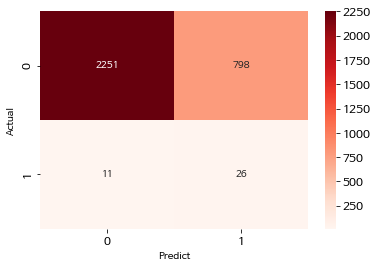

[[2251  798]
 [  11   26]]
accuracy 0.738
precision :  0.032
recall :  0.703
f1_score :  0.06
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'under', 'pr', array([[2251,  798],
       [  11,   26]]), 0.738, 0.032, 0.703, 0.703, 'none']
3. RUSE


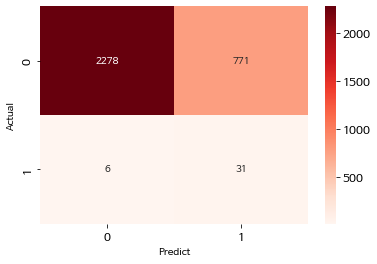

[[2278  771]
 [   6   31]]
accuracy 0.748
precision :  0.039
recall :  0.838
f1_score :  0.074
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'under', 'rf', array([[2278,  771],
       [   6,   31]]), 0.748, 0.039, 0.838, 0.838, 'none']
3. ROSE


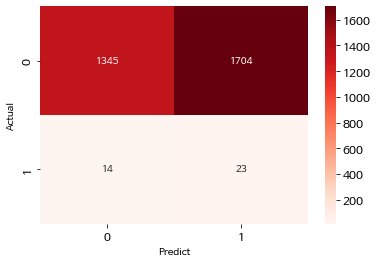

[[1345 1704]
 [  14   23]]
accuracy 0.443
precision :  0.013
recall :  0.622
f1_score :  0.026
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'over', 'lg', array([[1345, 1704],
       [  14,   23]]), 0.443, 0.013, 0.622, 0.622, 'none']
3. ROSE


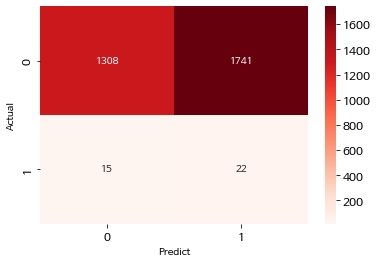

[[1308 1741]
 [  15   22]]
accuracy 0.431
precision :  0.012
recall :  0.595
f1_score :  0.024
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'over', 'sgd', array([[1308, 1741],
       [  15,   22]]), 0.431, 0.012, 0.595, 0.595, 'none']
3. ROSE


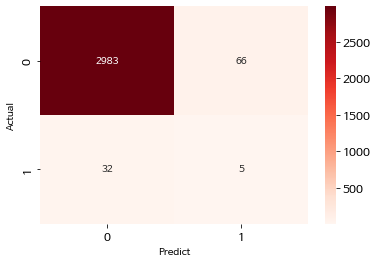

[[2983   66]
 [  32    5]]
accuracy 0.968
precision :  0.07
recall :  0.135
f1_score :  0.093
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'over', 'knn', array([[2983,   66],
       [  32,    5]]), 0.968, 0.07, 0.135, 0.135, 'none']
3. ROSE


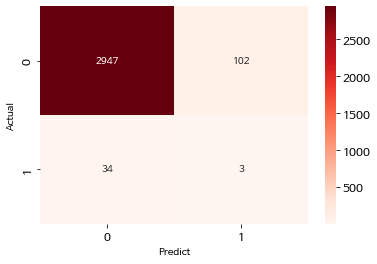

[[2947  102]
 [  34    3]]
accuracy 0.956
precision :  0.029
recall :  0.081
f1_score :  0.042
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'over', 'svm', array([[2947,  102],
       [  34,    3]]), 0.956, 0.029, 0.081, 0.081, 'none']
3. ROSE


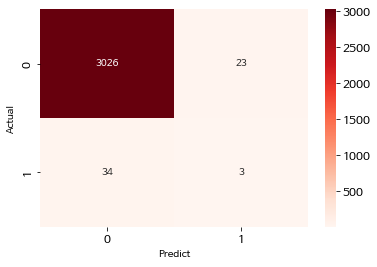

[[3026   23]
 [  34    3]]
accuracy 0.982
precision :  0.115
recall :  0.081
f1_score :  0.095
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'over', 'dt', array([[3026,   23],
       [  34,    3]]), 0.982, 0.115, 0.081, 0.081, 'none']
3. ROSE


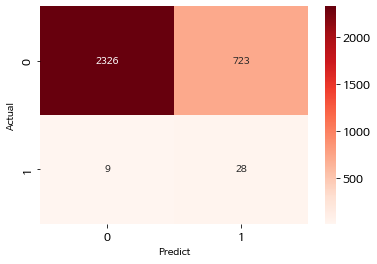

[[2326  723]
 [   9   28]]
accuracy 0.763
precision :  0.037
recall :  0.757
f1_score :  0.071
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'over', 'pr', array([[2326,  723],
       [   9,   28]]), 0.763, 0.037, 0.757, 0.757, 'none']
3. ROSE


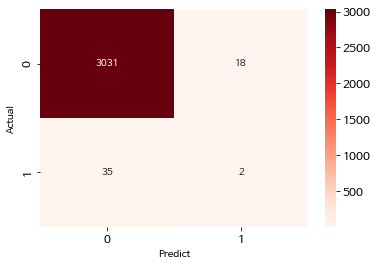

[[3031   18]
 [  35    2]]
accuracy 0.983
precision :  0.1
recall :  0.054
f1_score :  0.07
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'over', 'rf', array([[3031,   18],
       [  35,    2]]), 0.983, 0.1, 0.054, 0.054, 'none']
3. SMOTE


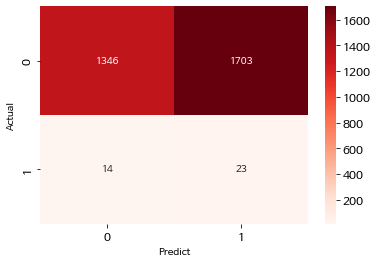

[[1346 1703]
 [  14   23]]
accuracy 0.444
precision :  0.013
recall :  0.622
f1_score :  0.026
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'smote', 'lg', array([[1346, 1703],
       [  14,   23]]), 0.444, 0.013, 0.622, 0.622, 'none']
3. SMOTE


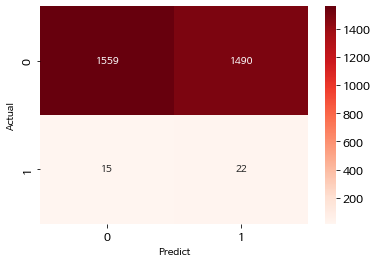

[[1559 1490]
 [  15   22]]
accuracy 0.512
precision :  0.015
recall :  0.595
f1_score :  0.028
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'smote', 'sgd', array([[1559, 1490],
       [  15,   22]]), 0.512, 0.015, 0.595, 0.595, 'none']
3. SMOTE


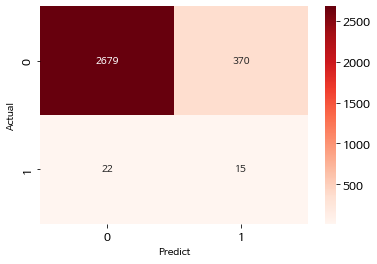

[[2679  370]
 [  22   15]]
accuracy 0.873
precision :  0.039
recall :  0.405
f1_score :  0.071
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'smote', 'knn', array([[2679,  370],
       [  22,   15]]), 0.873, 0.039, 0.405, 0.405, 'none']
3. SMOTE


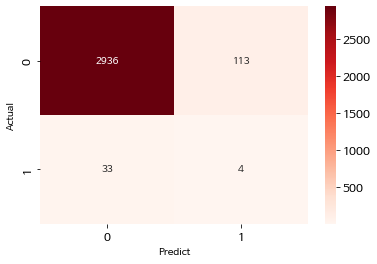

[[2936  113]
 [  33    4]]
accuracy 0.953
precision :  0.034
recall :  0.108
f1_score :  0.052
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'smote', 'svm', array([[2936,  113],
       [  33,    4]]), 0.953, 0.034, 0.108, 0.108, 'none']
3. SMOTE


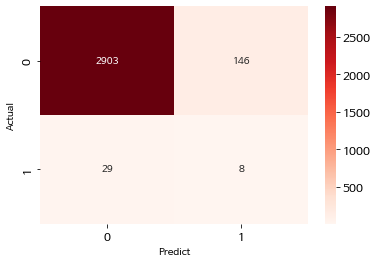

[[2903  146]
 [  29    8]]
accuracy 0.943
precision :  0.052
recall :  0.216
f1_score :  0.084
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'smote', 'dt', array([[2903,  146],
       [  29,    8]]), 0.943, 0.052, 0.216, 0.216, 'none']
3. SMOTE


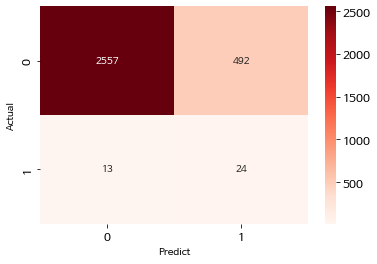

[[2557  492]
 [  13   24]]
accuracy 0.836
precision :  0.047
recall :  0.649
f1_score :  0.087
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'smote', 'pr', array([[2557,  492],
       [  13,   24]]), 0.836, 0.047, 0.649, 0.649, 'none']
3. SMOTE


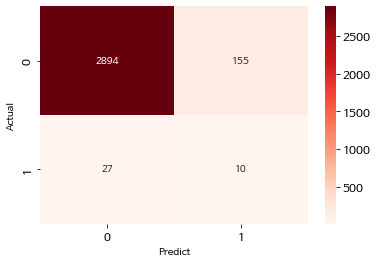

[[2894  155]
 [  27   10]]
accuracy 0.941
precision :  0.061
recall :  0.27
f1_score :  0.099
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'smote', 'rf', array([[2894,  155],
       [  27,   10]]), 0.941, 0.061, 0.27, 0.27, 'none']


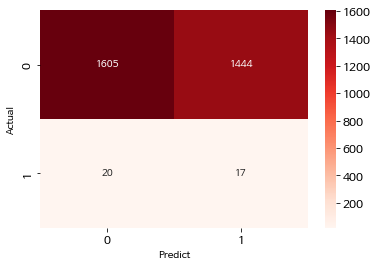

[[1605 1444]
 [  20   17]]
accuracy 0.526
precision :  0.012
recall :  0.459
f1_score :  0.023
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'None', 'lg', array([[1605, 1444],
       [  20,   17]]), 0.526, 0.012, 0.459, 0.459, 'none']


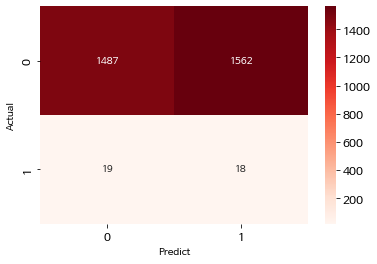

[[1487 1562]
 [  19   18]]
accuracy 0.488
precision :  0.011
recall :  0.486
f1_score :  0.022
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'None', 'sgd', array([[1487, 1562],
       [  19,   18]]), 0.488, 0.011, 0.486, 0.486, 'none']


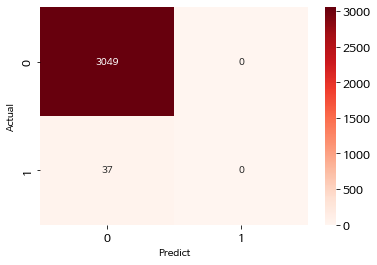

[[3049    0]
 [  37    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'None', 'knn', array([[3049,    0],
       [  37,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


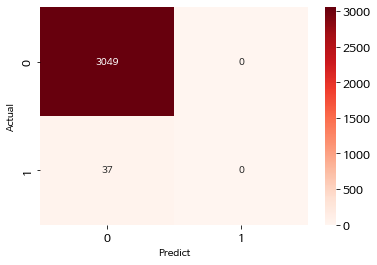

[[3049    0]
 [  37    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'None', 'svm', array([[3049,    0],
       [  37,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


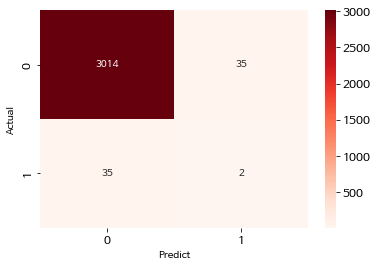

[[3014   35]
 [  35    2]]
accuracy 0.977
precision :  0.054
recall :  0.054
f1_score :  0.054
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'None', 'dt', array([[3014,   35],
       [  35,    2]]), 0.977, 0.054, 0.054, 0.054, 'none']


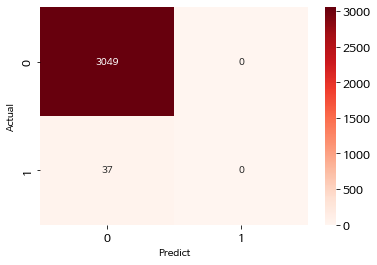

[[3049    0]
 [  37    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'None', 'pr', array([[3049,    0],
       [  37,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


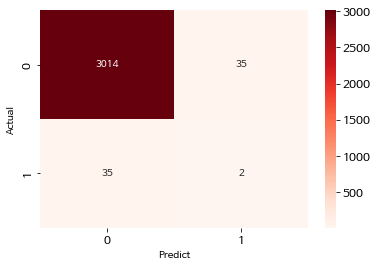

[[3014   35]
 [  35    2]]
accuracy 0.977
precision :  0.054
recall :  0.054
f1_score :  0.054
******** ['diff_df', 'Y', 't_Y', 'forward', ['growth_rate_비유동부채비율', 'growth_rate_EBITDA(백만원)', 'growth_rate_수지비율', 'growth_rate_EV/EBITDA(배)', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_적립금비율(재정비율)', 'growth_rate_운전자본회전률', 'growth_rate_자기자본순이익률', 'growth_rate_사내유보 대 자기자본비율', 'growth_rate_비유동비율', 'growth_rate_비유동장기적합률', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_유보액대비율'], 'None', 'rf', array([[3014,   35],
       [  35,    2]]), 0.977, 0.054, 0.054, 0.054, 'none']
1. split_by_R
****************
등분산성을 만족하는 feature 개수는 145개 입니다.
이분산성을 만족하는 feature 개수는 12개 입니다.
등분산성을 만족한 145개 feature에 대해 z_test를 시행합니다.
145개를 z-test 시행한 결과 34개가 출력되었습니다.
이분산성을 만족한 12개 feature에 대해 welch's t-test를 시행합니다.
12개를 z-test 시행한 결과 0개가 출력되었습니다.
위 결과를 합친 feature 총 34개에 대해 단변량 로짓 분석을 시행합니다.
단변량로짓으로 돌린 결과 25개가 추출됨
3. RUSE


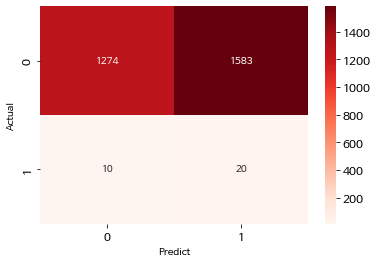

[[1274 1583]
 [  10   20]]
accuracy 0.448
precision :  0.012
recall :  0.667
f1_score :  0.024
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'under', 'lg', array([[1274, 1583],
       [  10,   20]]), 0.448, 0.012, 0.667, 0.667, 'none']
3. RUSE


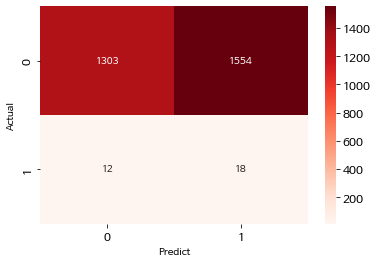

[[1303 1554]
 [  12   18]]
accuracy 0.458
precision :  0.011
recall :  0.6
f1_score :  0.022
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'under', 'sgd', array([[1303, 1554],
       [  12,   18]]), 0.458, 0.011, 0.6, 0.6, 'none']
3. RUSE


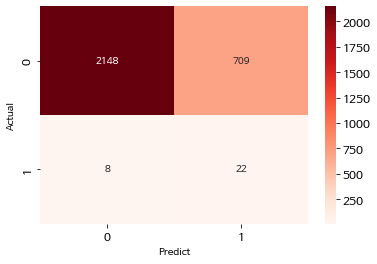

[[2148  709]
 [   8   22]]
accuracy 0.752
precision :  0.03
recall :  0.733
f1_score :  0.058
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'under', 'knn', array([[2148,  709],
       [   8,   22]]), 0.752, 0.03, 0.733, 0.733, 'none']
3. RUSE


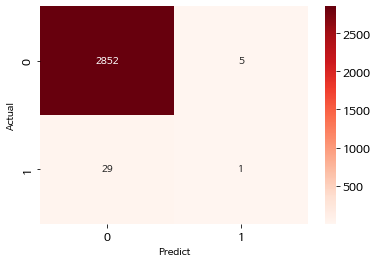

[[2852    5]
 [  29    1]]
accuracy 0.988
precision :  0.167
recall :  0.033
f1_score :  0.056
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'under', 'svm', array([[2852,    5],
       [  29,    1]]), 0.988, 0.167, 0.033, 0.033, 'none']
3. RUSE


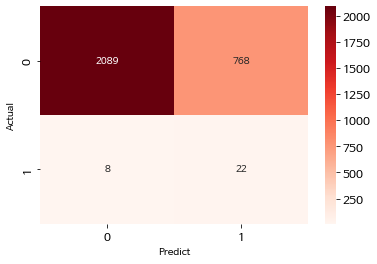

[[2089  768]
 [   8   22]]
accuracy 0.731
precision :  0.028
recall :  0.733
f1_score :  0.054
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'under', 'dt', array([[2089,  768],
       [   8,   22]]), 0.731, 0.028, 0.733, 0.733, 'none']
3. RUSE


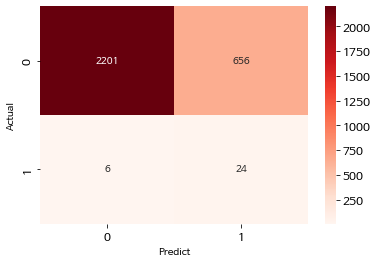

[[2201  656]
 [   6   24]]
accuracy 0.771
precision :  0.035
recall :  0.8
f1_score :  0.068
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'under', 'pr', array([[2201,  656],
       [   6,   24]]), 0.771, 0.035, 0.8, 0.8, 'none']
3. RUSE


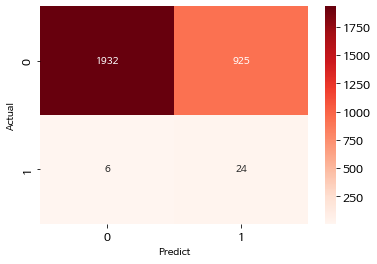

[[1932  925]
 [   6   24]]
accuracy 0.678
precision :  0.025
recall :  0.8
f1_score :  0.049
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'under', 'rf', array([[1932,  925],
       [   6,   24]]), 0.678, 0.025, 0.8, 0.8, 'none']
3. ROSE


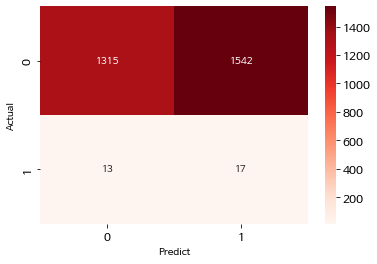

[[1315 1542]
 [  13   17]]
accuracy 0.461
precision :  0.011
recall :  0.567
f1_score :  0.021
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'over', 'lg', array([[1315, 1542],
       [  13,   17]]), 0.461, 0.011, 0.567, 0.567, 'none']
3. ROSE


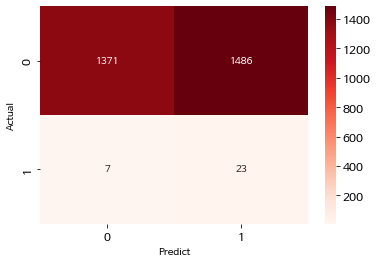

[[1371 1486]
 [   7   23]]
accuracy 0.483
precision :  0.015
recall :  0.767
f1_score :  0.03
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'over', 'sgd', array([[1371, 1486],
       [   7,   23]]), 0.483, 0.015, 0.767, 0.767, 'none']
3. ROSE


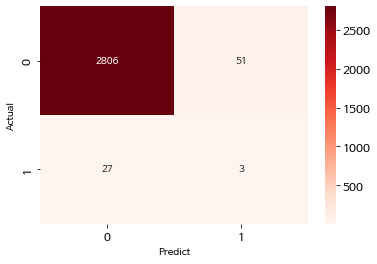

[[2806   51]
 [  27    3]]
accuracy 0.973
precision :  0.056
recall :  0.1
f1_score :  0.071
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'over', 'knn', array([[2806,   51],
       [  27,    3]]), 0.973, 0.056, 0.1, 0.1, 'none']
3. ROSE


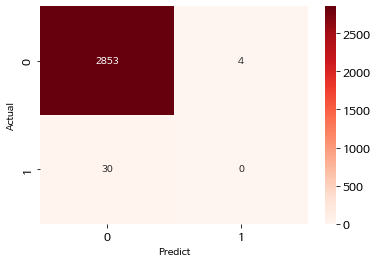

[[2853    4]
 [  30    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'over', 'svm', array([[2853,    4],
       [  30,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']
3. ROSE


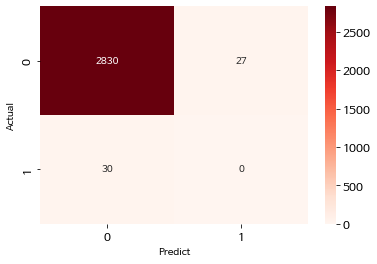

[[2830   27]
 [  30    0]]
accuracy 0.98
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'over', 'dt', array([[2830,   27],
       [  30,    0]]), 0.98, 0.0, 0.0, 0.0, 'none']
3. ROSE


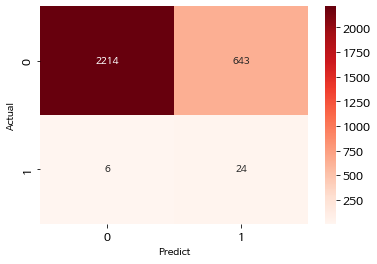

[[2214  643]
 [   6   24]]
accuracy 0.775
precision :  0.036
recall :  0.8
f1_score :  0.069
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'over', 'pr', array([[2214,  643],
       [   6,   24]]), 0.775, 0.036, 0.8, 0.8, 'none']
3. ROSE


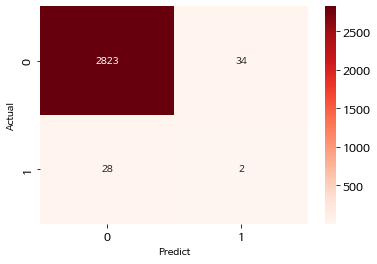

[[2823   34]
 [  28    2]]
accuracy 0.979
precision :  0.056
recall :  0.067
f1_score :  0.061
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'over', 'rf', array([[2823,   34],
       [  28,    2]]), 0.979, 0.056, 0.067, 0.067, 'none']
3. SMOTE


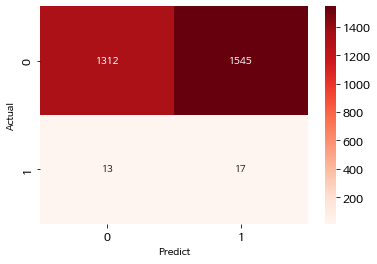

[[1312 1545]
 [  13   17]]
accuracy 0.46
precision :  0.011
recall :  0.567
f1_score :  0.021
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'smote', 'lg', array([[1312, 1545],
       [  13,   17]]), 0.46, 0.011, 0.567, 0.567, 'none']
3. SMOTE


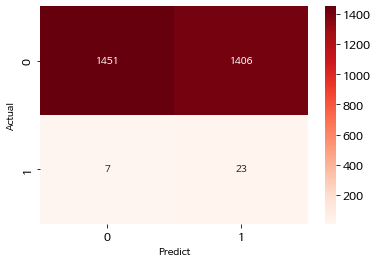

[[1451 1406]
 [   7   23]]
accuracy 0.511
precision :  0.016
recall :  0.767
f1_score :  0.032
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'smote', 'sgd', array([[1451, 1406],
       [   7,   23]]), 0.511, 0.016, 0.767, 0.767, 'none']
3. SMOTE


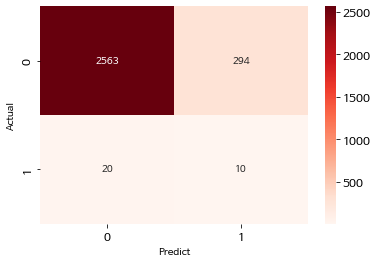

[[2563  294]
 [  20   10]]
accuracy 0.891
precision :  0.033
recall :  0.333
f1_score :  0.06
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'smote', 'knn', array([[2563,  294],
       [  20,   10]]), 0.891, 0.033, 0.333, 0.333, 'none']
3. SMOTE


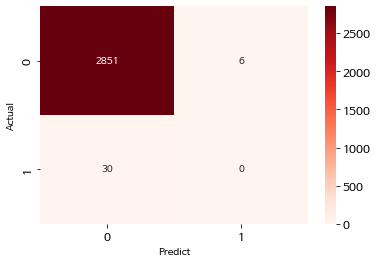

[[2851    6]
 [  30    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'smote', 'svm', array([[2851,    6],
       [  30,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']
3. SMOTE


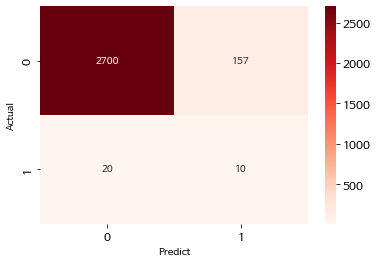

[[2700  157]
 [  20   10]]
accuracy 0.939
precision :  0.06
recall :  0.333
f1_score :  0.102
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'smote', 'dt', array([[2700,  157],
       [  20,   10]]), 0.939, 0.06, 0.333, 0.333, 'none']
3. SMOTE


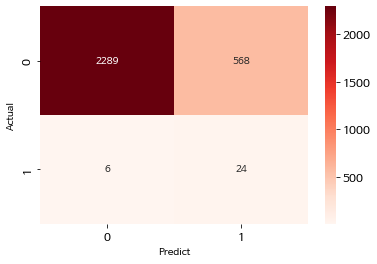

[[2289  568]
 [   6   24]]
accuracy 0.801
precision :  0.041
recall :  0.8
f1_score :  0.077
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'smote', 'pr', array([[2289,  568],
       [   6,   24]]), 0.801, 0.041, 0.8, 0.8, 'none']
3. SMOTE


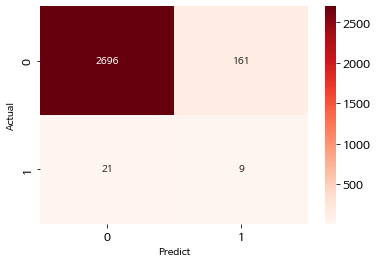

[[2696  161]
 [  21    9]]
accuracy 0.937
precision :  0.053
recall :  0.3
f1_score :  0.09
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'smote', 'rf', array([[2696,  161],
       [  21,    9]]), 0.937, 0.053, 0.3, 0.3, 'none']


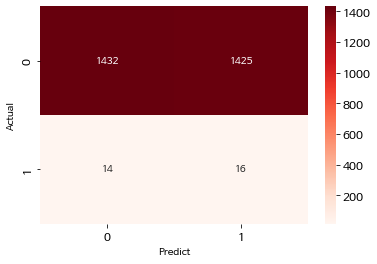

[[1432 1425]
 [  14   16]]
accuracy 0.502
precision :  0.011
recall :  0.533
f1_score :  0.022
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'None', 'lg', array([[1432, 1425],
       [  14,   16]]), 0.502, 0.011, 0.533, 0.533, 'none']


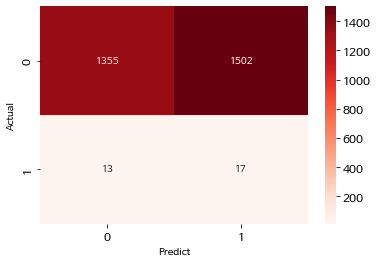

[[1355 1502]
 [  13   17]]
accuracy 0.475
precision :  0.011
recall :  0.567
f1_score :  0.022
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'None', 'sgd', array([[1355, 1502],
       [  13,   17]]), 0.475, 0.011, 0.567, 0.567, 'none']


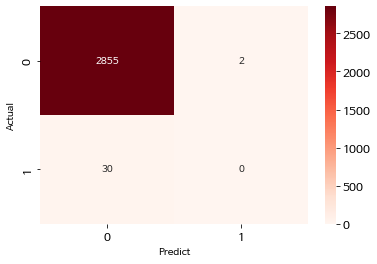

[[2855    2]
 [  30    0]]
accuracy 0.989
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'None', 'knn', array([[2855,    2],
       [  30,    0]]), 0.989, 0.0, 0.0, 0.0, 'none']


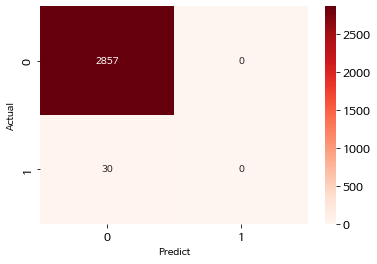

[[2857    0]
 [  30    0]]
accuracy 0.99
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'None', 'svm', array([[2857,    0],
       [  30,    0]]), 0.99, 0.0, 0.0, 0.0, 'none']


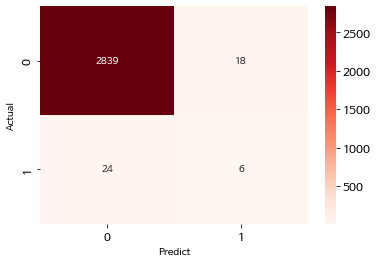

[[2839   18]
 [  24    6]]
accuracy 0.985
precision :  0.25
recall :  0.2
f1_score :  0.222
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'None', 'dt', array([[2839,   18],
       [  24,    6]]), 0.985, 0.25, 0.2, 0.2, 'none']


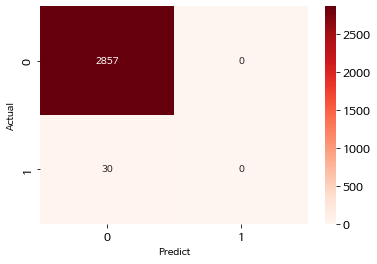

[[2857    0]
 [  30    0]]
accuracy 0.99
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'None', 'pr', array([[2857,    0],
       [  30,    0]]), 0.99, 0.0, 0.0, 0.0, 'none']


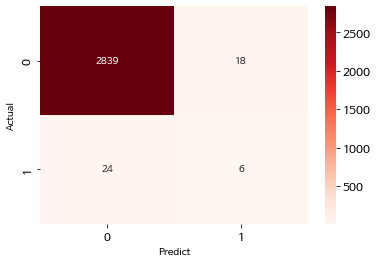

[[2839   18]
 [  24    6]]
accuracy 0.985
precision :  0.25
recall :  0.2
f1_score :  0.222
******** ['diff_df', 'R', 't_Y', 'forward', ['growth_rate_EBITDA(백만원)', 'growth_rate_비유동부채비율', 'growth_rate_종업원1인당 매출액(백만원)', 'growth_rate_수지비율', 'growth_rate_운전자본회전률', 'growth_rate_CASH FLOW 대 차입금비율', 'growth_rate_자기자본순이익률', 'growth_rate_부채비율', 'growth_rate_비유동장기적합률', 'growth_rate_유보액대비율', 'growth_rate_유동자산 대 비유동자산비율', 'growth_rate_CASH FLOW 대 총자본비율', 'growth_rate_EBITDA/매출액(%)', 'growth_rate_순운전자본회전률'], 'None', 'rf', array([[2839,   18],
       [  24,    6]]), 0.985, 0.25, 0.2, 0.2, 'none']


In [ ]:
for file_name in ['basic_final_df', 'JH_binning_8', 'diff_df']:
  df = pd.read_csv(file_name+'.csv')
  for split in ['Y', 'R']:
    if split == 'Y' :
      X_train, y_train, X_test, y_test = split_by_Y(df)
    elif split == 'R' :
      X_train, y_train, X_test, y_test = split_by_R(df)

    # forward_feature_selection
    variables = t_test_(X_train, y_train)
    #variables = X_train.columns.tolist() ## 설명 변수 리스트
  
    y = y_train ## 반응 변수
    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = X_train[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit()
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break


    X_train = X_train[selected_variables]
    X_test = X_test[selected_variables] 

    for sampling_method in ['under', 'over','smote','None']:
      for m in ['lg', 'sgd', 'knn', 'svm', 'dt', 'pr','rf']:
        condition = [file_name, split, 't_Y','forward', selected_variables, sampling_method, m]
        RUN_ALL(X_train, y_train, X_test, y_test, sampling_method, m)
        condition.append('none') # parameter 조정 X
        print("********", condition)
        store_result(condition)

## backward

In [ ]:
import statsmodels.api as sm

1. split_by_Y
****************
등분산성을 만족하는 feature 개수는 141개 입니다.
이분산성을 만족하는 feature 개수는 16개 입니다.
등분산성을 만족한 141개 feature에 대해 z_test를 시행합니다.
141개를 z-test 시행한 결과 60개가 출력되었습니다.
이분산성을 만족한 16개 feature에 대해 welch's t-test를 시행합니다.
16개를 z-test 시행한 결과 8개가 출력되었습니다.
위 결과를 합친 feature 총 68개에 대해 단변량 로짓 분석을 시행합니다.
단변량로짓으로 돌린 결과 66개가 추출됨
3. RUSE


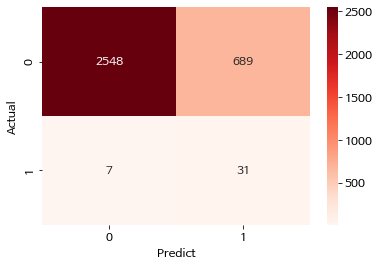

[[2548  689]
 [   7   31]]
accuracy 0.787
precision :  0.043
recall :  0.816
f1_score :  0.082
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'under', 'lg', array([[2548,  689],
       [   7,   31]]), 0.787, 0.043, 0.816, 0.816, 'none']
3. RUSE


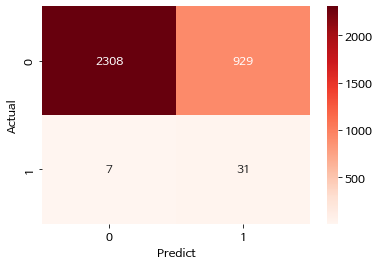

[[2308  929]
 [   7   31]]
accuracy 0.714
precision :  0.032
recall :  0.816
f1_score :  0.062
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'under', 'sgd', array([[2308,  929],
       [   7,   31]]), 0.714, 0.032, 0.816, 0.816, 'none']
3. RUSE


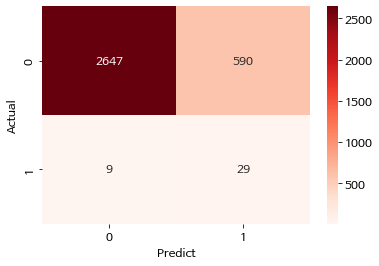

[[2647  590]
 [   9   29]]
accuracy 0.817
precision :  0.047
recall :  0.763
f1_score :  0.088
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'under', 'knn', array([[2647,  590],
       [   9,   29]]), 0.817, 0.047, 0.763, 0.763, 'none']
3. RUSE


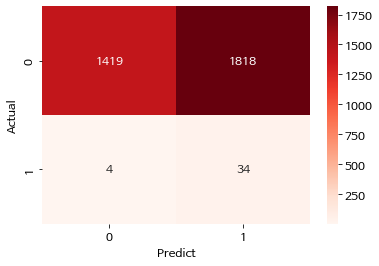

[[1419 1818]
 [   4   34]]
accuracy 0.444
precision :  0.018
recall :  0.895
f1_score :  0.036
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'under', 'svm', array([[1419, 1818],
       [   4,   34]]), 0.444, 0.018, 0.895, 0.895, 'none']
3. RUSE


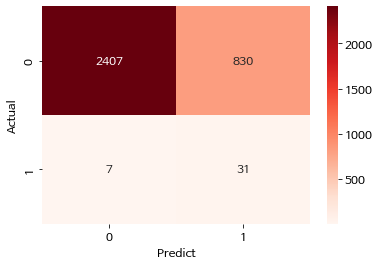

[[2407  830]
 [   7   31]]
accuracy 0.744
precision :  0.036
recall :  0.816
f1_score :  0.069
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'under', 'dt', array([[2407,  830],
       [   7,   31]]), 0.744, 0.036, 0.816, 0.816, 'none']
3. RUSE


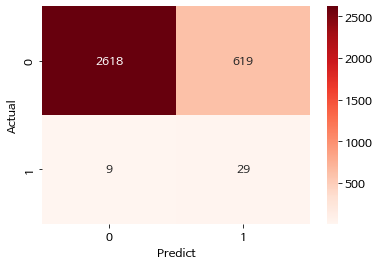

[[2618  619]
 [   9   29]]
accuracy 0.808
precision :  0.045
recall :  0.763
f1_score :  0.085
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'under', 'pr', array([[2618,  619],
       [   9,   29]]), 0.808, 0.045, 0.763, 0.763, 'none']
3. RUSE


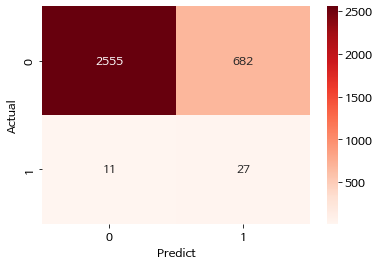

[[2555  682]
 [  11   27]]
accuracy 0.788
precision :  0.038
recall :  0.711
f1_score :  0.072
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'under', 'rf', array([[2555,  682],
       [  11,   27]]), 0.788, 0.038, 0.711, 0.711, 'none']
3. ROSE


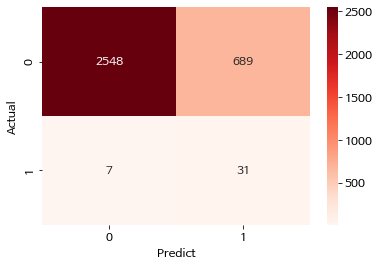

[[2548  689]
 [   7   31]]
accuracy 0.787
precision :  0.043
recall :  0.816
f1_score :  0.082
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'over', 'lg', array([[2548,  689],
       [   7,   31]]), 0.787, 0.043, 0.816, 0.816, 'none']
3. ROSE


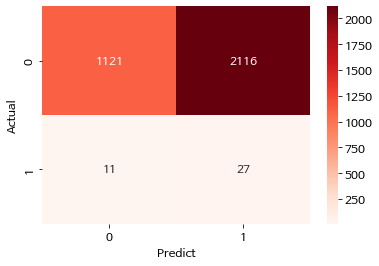

[[1121 2116]
 [  11   27]]
accuracy 0.351
precision :  0.013
recall :  0.711
f1_score :  0.025
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'over', 'sgd', array([[1121, 2116],
       [  11,   27]]), 0.351, 0.013, 0.711, 0.711, 'none']
3. ROSE


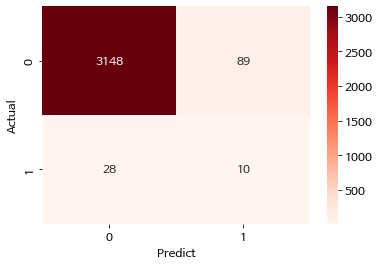

[[3148   89]
 [  28   10]]
accuracy 0.964
precision :  0.101
recall :  0.263
f1_score :  0.146
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'over', 'knn', array([[3148,   89],
       [  28,   10]]), 0.964, 0.101, 0.263, 0.263, 'none']
3. ROSE


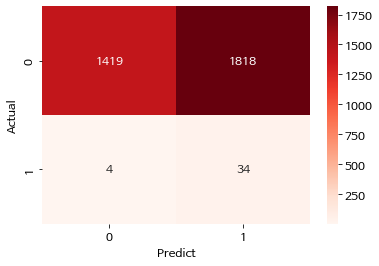

[[1419 1818]
 [   4   34]]
accuracy 0.444
precision :  0.018
recall :  0.895
f1_score :  0.036
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'over', 'svm', array([[1419, 1818],
       [   4,   34]]), 0.444, 0.018, 0.895, 0.895, 'none']
3. ROSE


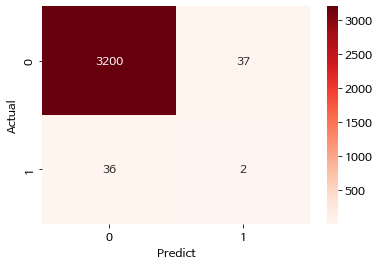

[[3200   37]
 [  36    2]]
accuracy 0.978
precision :  0.051
recall :  0.053
f1_score :  0.052
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'over', 'dt', array([[3200,   37],
       [  36,    2]]), 0.978, 0.051, 0.053, 0.053, 'none']
3. ROSE


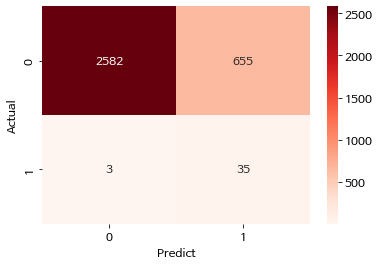

[[2582  655]
 [   3   35]]
accuracy 0.799
precision :  0.051
recall :  0.921
f1_score :  0.096
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'over', 'pr', array([[2582,  655],
       [   3,   35]]), 0.799, 0.051, 0.921, 0.921, 'none']
3. ROSE


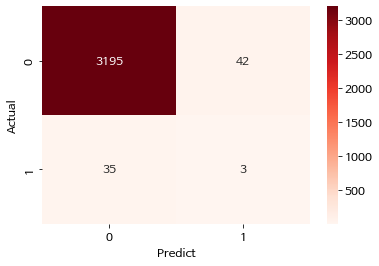

[[3195   42]
 [  35    3]]
accuracy 0.976
precision :  0.067
recall :  0.079
f1_score :  0.072
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'over', 'rf', array([[3195,   42],
       [  35,    3]]), 0.976, 0.067, 0.079, 0.079, 'none']
3. SMOTE


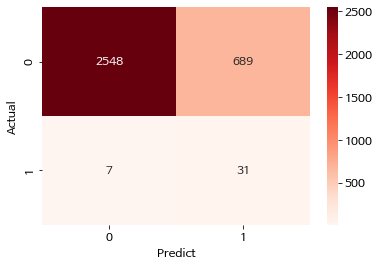

[[2548  689]
 [   7   31]]
accuracy 0.787
precision :  0.043
recall :  0.816
f1_score :  0.082
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'smote', 'lg', array([[2548,  689],
       [   7,   31]]), 0.787, 0.043, 0.816, 0.816, 'none']
3. SMOTE


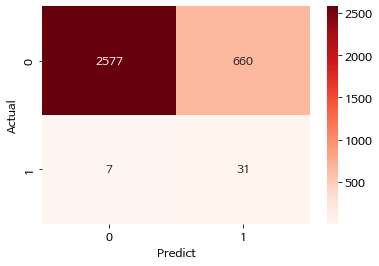

[[2577  660]
 [   7   31]]
accuracy 0.796
precision :  0.045
recall :  0.816
f1_score :  0.085
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'smote', 'sgd', array([[2577,  660],
       [   7,   31]]), 0.796, 0.045, 0.816, 0.816, 'none']
3. SMOTE


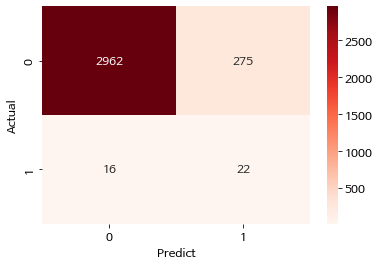

[[2962  275]
 [  16   22]]
accuracy 0.911
precision :  0.074
recall :  0.579
f1_score :  0.131
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'smote', 'knn', array([[2962,  275],
       [  16,   22]]), 0.911, 0.074, 0.579, 0.579, 'none']
3. SMOTE


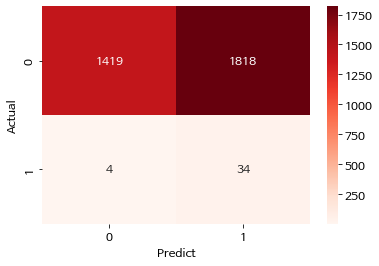

[[1419 1818]
 [   4   34]]
accuracy 0.444
precision :  0.018
recall :  0.895
f1_score :  0.036
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'smote', 'svm', array([[1419, 1818],
       [   4,   34]]), 0.444, 0.018, 0.895, 0.895, 'none']
3. SMOTE


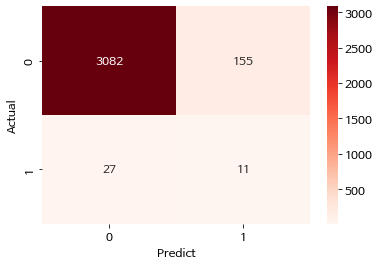

[[3082  155]
 [  27   11]]
accuracy 0.944
precision :  0.066
recall :  0.289
f1_score :  0.108
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'smote', 'dt', array([[3082,  155],
       [  27,   11]]), 0.944, 0.066, 0.289, 0.289, 'none']
3. SMOTE


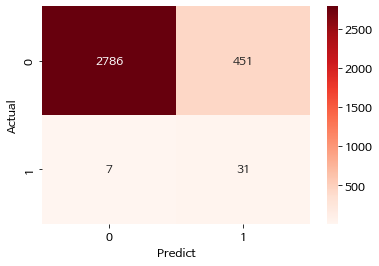

[[2786  451]
 [   7   31]]
accuracy 0.86
precision :  0.064
recall :  0.816
f1_score :  0.119
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'smote', 'pr', array([[2786,  451],
       [   7,   31]]), 0.86, 0.064, 0.816, 0.816, 'none']
3. SMOTE


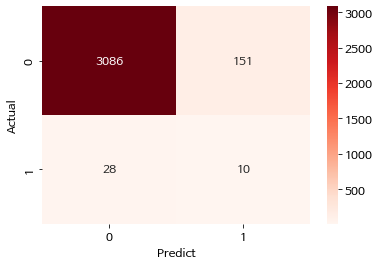

[[3086  151]
 [  28   10]]
accuracy 0.945
precision :  0.062
recall :  0.263
f1_score :  0.101
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'smote', 'rf', array([[3086,  151],
       [  28,   10]]), 0.945, 0.062, 0.263, 0.263, 'none']


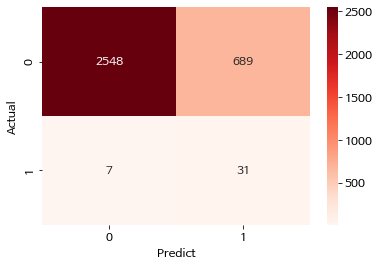

[[2548  689]
 [   7   31]]
accuracy 0.787
precision :  0.043
recall :  0.816
f1_score :  0.082
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'None', 'lg', array([[2548,  689],
       [   7,   31]]), 0.787, 0.043, 0.816, 0.816, 'none']


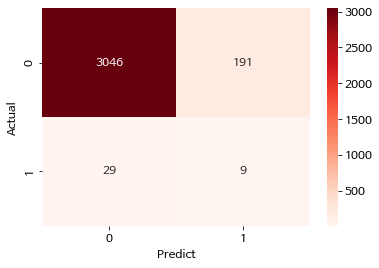

[[3046  191]
 [  29    9]]
accuracy 0.933
precision :  0.045
recall :  0.237
f1_score :  0.076
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'None', 'sgd', array([[3046,  191],
       [  29,    9]]), 0.933, 0.045, 0.237, 0.237, 'none']


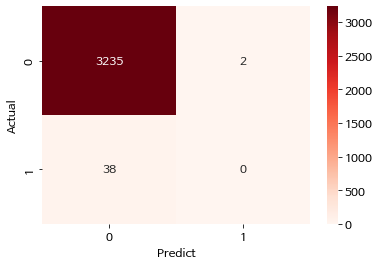

[[3235    2]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'None', 'knn', array([[3235,    2],
       [  38,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


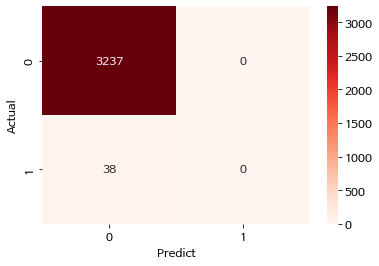

[[3237    0]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'None', 'svm', array([[3237,    0],
       [  38,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


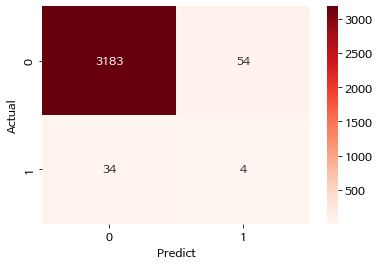

[[3183   54]
 [  34    4]]
accuracy 0.973
precision :  0.069
recall :  0.105
f1_score :  0.083
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'None', 'dt', array([[3183,   54],
       [  34,    4]]), 0.973, 0.069, 0.105, 0.105, 'none']


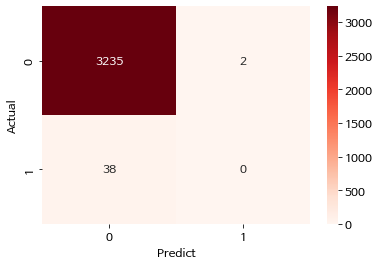

[[3235    2]
 [  38    0]]
accuracy 0.988
precision :  0.0
recall :  0.0
f1_score :  0.0
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'None', 'pr', array([[3235,    2],
       [  38,    0]]), 0.988, 0.0, 0.0, 0.0, 'none']


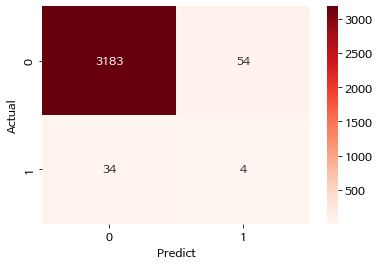

[[3183   54]
 [  34    4]]
accuracy 0.973
precision :  0.069
recall :  0.105
f1_score :  0.083
******** ['basic_final_df', 'Y', 't_Y', 'backward', ['자기자본증가율', '종업원1인당 인건비증가율', '매출액영업이익률', '총자본사업이익률', '총자본영업이익률', '총자본순이익률', '자기자본순이익률', '기업순이익률', '경영자본영업이익률', '경영자본순이익률', '영업비율', '금융비용부담률', '외환이익 대 매출액비율', '수지비율', '금융비용 대 총비용비율', '적립금비율(재정비율)', 'EPS(Earning Per Share)(원)', '자기자본구성비율', '타인자본구성비율', '비유동비율', '비유동장기적합률', '부채비율', '유동부채비율', '비유동부채비율', '순운전자본비율', '차입금의존도', '이자보상배율(순금융비용)', 'CASH FLOW 대 총자본비율', '타인자본회전률', '유동자산회전률', '종업원1인당 순이익(백만원)', 'EBITDA/매출액(%)', '매출액총이익률', '매출액순이익률', '재고자산 대 유동자산비율', '단기차입금 대 총차입금비율'], 'None', 'rf', array([[3183,   54],
       [  34,    4]]), 0.973, 0.069, 0.105, 0.105, 'none']
1. split_by_R
****************
등분산성을 만족하는 feature 개수는 141개 입니다.
이분산성을 만족하는 feature 개수는 16개 입니다.
등분산성을 만족한 141개 feature에 대해 z_test를 시행합니다.
141개를 z-test 시행한 결과 52개가 출력되었습니다.
이분산성을 만족한 16개 feature에 대해 welch's t-test를 시행합니다.
16개를 z-test 시행한 결과 6개가 출력되었습니다.
위 결과를 합친 feature 총 58개에 대해 단변량 

AttributeError: ignored

In [ ]:
for file_name in ['basic_final_df', 'JH_binning_8', 'diff_df']:
  df = pd.read_csv(file_name+'.csv')
  for split in ['Y', 'R']:
    if split == 'Y' :
      X_train, y_train, X_test, y_test = split_by_Y(df)
    elif split == 'R' :
      X_train, y_train, X_test, y_test = split_by_R(df)


    # backward_feature_selection
    variables = t_test_(X_train, y_train)
    #variables = X_train.columns.tolist() ## 설명 변수 리스트
 
    y = y_train ## 반응 변수
    selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(selected_variables) > 0:
      X = X_train[selected_variables] 
      X = sm.add_constant(X,has_constant="add")
      p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
      max_pval = p_vals.max() ## 최대 p-value
      if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
  
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(X)).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
      else:
        break
            
    X_train = X_train[selected_variables]
    X_test = X_test[selected_variables] 

    for sm in ['under', 'over','smote','None']:
      for m in ['lg', 'sgd', 'knn', 'svm', 'dt', 'pr','rf']:
        condition = [file_name, split, 't_Y','backward', selected_variables, sm, m]
        RUN_ALL(X_train, y_train, X_test, y_test, sm, m)
        condition.append('none') # parameter 조정 X
        print("********", condition)
        store_result(condition)

## stepwise

In [ ]:
import statsmodels.api as sm

In [ ]:
for file_name in ['basic_final_df', 'JH_binning_8', 'diff_df']:
  df = pd.read_csv(file_name+'.csv')
  for split in ['Y', 'R']:
    if split == 'Y' :
      X_train, y_train, X_test, y_test = split_by_Y(df)
    elif split == 'R' :
      X_train, y_train, X_test, y_test = split_by_R(df)

    # stepwise_feature_selection
    variables = t_test_(X_train, y_train)
    #variables = X_train.columns.tolist() ## 설명 변수 리스트
    y = y_train ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = X_train[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit()
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break
            

    X_train = X_train[selected_variables]
    X_test = X_test[selected_variables] 

    for sm in ['under', 'over','smote','None']:
      for m in ['lg', 'sgd', 'knn', 'svm', 'dt', 'pr','rf']:
        condition = [file_name, split, 't_Y','stepwise', selected_variables, sm, m]
        RUN_ALL(X_train, y_train, X_test, y_test, sm, m)
        condition.append('none') # parameter 조정 X
        store_result(condition)

1. split_by_Y
****************
등분산성을 만족하는 feature 개수는 141개 입니다.
이분산성을 만족하는 feature 개수는 16개 입니다.
등분산성을 만족한 141개 feature에 대해 z_test를 시행합니다.
141개를 z-test 시행한 결과 60개가 출력되었습니다.
이분산성을 만족한 16개 feature에 대해 welch's t-test를 시행합니다.
16개를 z-test 시행한 결과 8개가 출력되었습니다.
위 결과를 합친 feature 총 68개에 대해 단변량 로짓 분석을 시행합니다.
단변량로짓으로 돌린 결과 66개가 추출됨


AttributeError: ignored

## lasso

In [ ]:
for file_name in ['basic_final_df', 'JH_binning_8', 'diff_df']:
  df = pd.read_csv(file_name+'.csv')
  
  for split in ['Y', 'R']:
    if split == 'Y' :
      X_train, y_train, X_test, y_test = split_by_Y(df)
    elif split == 'R' :
      X_train, y_train, X_test, y_test = split_by_R(df)

    variables = t_test_(X_train, y_train)
    
    #lasso
    reg = LassoCV()
    reg.fit(X_train[variables], y_train)
    coef = pd.Series(reg.coef_, index = X_train[variables].columns)
  
    imp_coef = coef.sort_values(ascending=False)
    selected_variables = imp_coef[imp_coef!=0]
            
    print(selected_variables)
    X_train = X_train[selected_variables]
    X_test = X_test[selected_variables]

    for sm in ['under', 'over','smote','None']:
      for m in ['lg', 'sgd', 'knn', 'svm', 'dt', 'pr','rf']:
        condition = [file_name, split, 't_Y','lasso', selected_variables, sm, m]
        RUN_ALL(X_train, y_train, X_test, y_test, sm, m)
        condition.append('none') # parameter 조정 X
        store_result(condition)

1. split_by_Y
****************
등분산성을 만족하는 feature 개수는 141개 입니다.
이분산성을 만족하는 feature 개수는 16개 입니다.
등분산성을 만족한 141개 feature에 대해 z_test를 시행합니다.
141개를 z-test 시행한 결과 60개가 출력되었습니다.
이분산성을 만족한 16개 feature에 대해 welch's t-test를 시행합니다.
16개를 z-test 시행한 결과 8개가 출력되었습니다.
위 결과를 합친 feature 총 68개에 대해 단변량 로짓 분석을 시행합니다.
단변량로짓으로 돌린 결과 66개가 추출됨
이자보상배율(순금융비용)   -1.283170e-11
dtype: float64


KeyError: ignored